<a href="https://colab.research.google.com/github/DimasRumay/API-Fabrica/blob/main/Proyecto_Final_Dimas_Rumay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de compras para una fábrica**

---



## Abstract

---

El análisis de compras para la fábrica, surge de la inminente necesidad de solucionar los recurrentes problemas de abastecimiento que afecta la producción, esto ocasiona demoras en la fecha de entrega a los clientes.

Es por ello, que el objetivo de este proyecto es predecir la cantidad y los tiempos de abastecimiento de los accesorios que serán necesarios para un año de producción.

Esto facilitará la toma de decisiones en el área de compras de la empresa, ya que, se conocerá con anticipación lo que será utilizado, sin generar compras excesivas que generen stocks inmovilizados para determinados artículos.

Para ello, se analizará los datos de compras de accesorios de enero del 2020 hasta agosto del 2023, a fin de buscar patrones estacionales, conocer las cantidades mensuales que serán necesarias y determinar un presupuesto general para la compra de los mismo.

Al definir estos parámetros mencionados, se podrá desarrollar una mejor planificación de compras, donde se dará prioridad a los artículos más demandados para evitar faltantes.

Además, permitirá una mejor negociación con proveedores, porque se conocerá, previamente, las cantidades necesarias, los costos de los mismos y el tiempo en el que se deberá pactar la entrega para no alterar los tiempos de producción.

Este enfoque proporcionará un entendimiento más preciso de las necesidades de la fábrica basado en datos. Como última instancia, permitirá gestionar de manera óptima, los inventarios, tiempo de reposición y recursos financieros.



## Preguntas/Hipótesis

---

En una primera instancia, plantearé la siguiente pregunta que será resuelta mediante el planteamiento de 3 hipótesis.

Además, presentaré el DataFrame a estudiar, destacando las variables "Desc", "Cant UM1", "Impte. Neto mon. Local", "Año Contab" y "Mes Contab".


### Pregunta

---

¿Existe alguna relación entre las variables y el caso real?

Para abordar esta pregunta, exploraré la combinación de dos y tres variables con el fin de identificar patrones de consumo que, por un lado reflejen y por otro lado, guarden relación con la situación real.


### Configuración y Datos

---

En esta etapa, configuraré la notebook mediante la importación de las librerías necesarias para el proyecto. Además, cargaré el DataFrame que será objeto de estudio.

#### Configuración de notebook

---

Conecto Google Colab con mi GitHub. Además, importo las librerías de Python que serán empleadas.

In [207]:
# @title
# CONEXION GOOGLE COLAB Y GOOGLE DRIVE

# Conecto GitHub a Google Colab
url='https://raw.githubusercontent.com/DimasRumay/Analisis-de-compra/main/BD_3.csv'

In [ ]:
pip install category_encoders

In [ ]:
# @title
# Importo librerias
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import locale

from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from category_encoders import TargetEncoder

from sklearn.decomposition import PCA

from statsmodels.tsa.stattools import adfuller

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### Datos de API

---

Extraigo la API a traves de un repositorio en GitHub.

In [ ]:
# @title
# Defino la URL del archivo CSV en GitHub
bd2 = 'https://raw.githubusercontent.com/DimasRumay/API-Fabrica/main/BD2.csv'

# Cargo el archivo CSV en un DataFrame de pandas
df2 = pd.read_csv(bd2,sep=';', encoding ='latin-1')

# Muestra las primeras filas para verificar que se haya importado correctamente
print(df2.head())

  spctco_Cod  spc_Nro sdc_FContab  Cliente sdcart_CodGen sdccon_Cod  \
0        OCP     5603    2-dic-19     1760      9,99E+11        NaN   
1        OCP     8354    7-ago-23     1561      77050002        NaN   
2        OCP     8354    7-ago-23     1561      77050001        NaN   
3        OCP     8356    7-ago-23     2418      77200094        NaN   
4        OCP     8355    7-ago-23     2418       9990236        NaN   

                            sdc_Desc sdc_CantUM1 sdc_PrecioUn sdc_ImpTot  
0  CENTRO - Ø- 3/8" x 040 - CAB. Ø16         500      1235,04     617520  
1                            GAS OIL           1    851999,76  851999,76  
2                              NAFTA           1    301717,92  301717,92  
3                  Bulones y tuercas           1     69421,48  69421,488  
4         TUERCA 3/4"x 16H NF AUTOFR          63      6107,76  384788,88  


#### Normalización de API

---

Eliminaré los valores nulos y las columnas que no serán utilizadas en este análisis.

In [ ]:
# @title
# Lista de columnas que quiero conservar para el estudio
art = ['sdc_FContab', 'sdcart_CodGen', 'sdc_Desc','sdc_CantUM1', 'sdc_ImpTot']

# Elimina las columnas que no están en la lista
df2_art = df2[art]

# Elimina las filas que contienen valores nulos
df2_art = df2_art.dropna()

Por otro lado, convertiré a tipo númerico de la variable "sdc_ImpTot".


In [ ]:
# @title
# Establecer la configuración regional para el formato de moneda
locale.setlocale(locale.LC_ALL, '')

# Limpio la columna 'sdc_ImpTot' convirtiendo a tipo numérico y manejando errores
df2_art['sdc_ImpTot'] = pd.to_numeric(df2_art['sdc_ImpTot'].astype(str).str.replace('[,.]', '', regex=True), errors='coerce')

# Mostrar por pantalla
df2_art.head()

,sdc_FContab,sdcart_CodGen,sdc_Desc,sdc_CantUM1,sdc_ImpTot
0,2-dic-19,"9,99E+11","CENTRO - Ø- 3/8"" x 040 - CAB. Ø16",500,617520
1,7-ago-23,77050002,GAS OIL,1,85199976
2,7-ago-23,77050001,NAFTA,1,30171792
3,7-ago-23,77200094,Bulones y tuercas,1,69421488
4,7-ago-23,9990236,"TUERCA 3/4""x 16H NF AUTOFR",63,38478888


#### DataFrame utilizado

---

Desde Drive, importo el DataFrame de interes.

In [208]:
# @title
# COMPRAS 2020 A 2023

# Cargo el archivo CSV en un DataFrame
df3 = pd.read_csv(url,sep=';', encoding ='latin-1')

# Mostrar por pantalla
df3

,Año Contab,Mes Contab,Dia Contab,F. Contab,Año Emisión,Mes Emisión,Dia Emisión,F. Emisión,Comp,Prov - Cód,...,Artículo - Cód Gen,Desc,Artículo - Clase - Cód,Artículo - Ord 1 - Cód,Artículo - Ord 1,Artículo - Ord 2 - Cód,Artículo - Ord 2,Cant UM 1,Precio unitario,Impte. Neto mon. Local
0,2020,6,1,01/6/2020,2019,6,14,14/06/2019,FC A 00002-00004490,463,...,999032050002,"TOR-Ø.1/2""x5"" - CAB HEX 12h G5 zincado",200,BA20,BULONES,WA10,ACCESORIOS,300,"$ 13,97","$ 4.191,00"
1,2020,6,1,01/06/2020,2019,6,14,14/06/2019,FC A 00002-00004490,463,...,999032060000,"TOR-Ø.1/2""x 5 1/2"" - CAB HEX 12h G5 Zincado",200,BA20,BULONES,WA10,ACCESORIOS,100,"$ 15,69","$ 1.568,60"
2,2020,2,1,01/02/2020,2019,7,5,05/07/2019,FC A 00002-00065382,1587,...,9990201,"TUERCA Ø.3/8""-8,26x14,2-USS NC-16H",200,BA30,TUERCAS,WA10,ACCESORIOS,5000,"$ 0,35","$ 1.732,06"
3,2020,2,1,01/02/2020,2019,7,5,05/07/2019,FC A 00002-00065382,1587,...,9990218,"TUERCA Ø.14 x 1,50H AUTOF. C8,8",200,BA30,TUERCAS,WA10,ACCESORIOS,1500,"$ 2,06","$ 3.090,25"
4,2020,2,1,01/02/2020,2019,7,5,05/07/2019,FC A 00002-00065382,1587,...,9990622500,"REMACHE - Ø. 1/2"" x 25 - (24 Uni x Kg)",200,BA50,REMACHES,WA10,ACCESORIOS,2400,"$ 2,96","$ 7.108,59"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,2023,7,27,27/07/2023,2023,7,27,27/07/2023,FC A 00001-00024006,5156,...,77070003,Papel Higenico,380,XC00,LIMPIEZA,XA10,INSUMOS NO PRODUCTIVOS,6,"$ 1.013,07","$ 6.078,41"
5433,2023,7,31,31/07/2023,2023,7,31,31/07/2023,FC A 00006-00053969,2176,...,77025014,GUANTE TEJIDO BAÑO LATEX DORSO VENT.(ARMADOR),320,XA50,GUANTES/MANOPLAS,XA10,INSUMOS NO PRODUCTIVOS,48,"$ 252,89","$ 12.138,72"
5434,2023,7,31,31/07/2023,2023,7,31,31/07/2023,FC A 00006-00053969,2176,...,77025001,GUANTE ALGODON MOTEADO,320,XA50,GUANTES/MANOPLAS,XA10,INSUMOS NO PRODUCTIVOS,480,"$ 63,33","$ 30.398,02"
5435,2023,7,31,31/07/2023,2023,7,31,31/07/2023,FC A 00006-00053969,2176,...,77030009,MAMELUCO TYVEK P/ PINTURA,320,XA60,PROTECTORES,XA10,INSUMOS NO PRODUCTIVOS,10,"$ 531,99","$ 5.319,86"


In [ ]:
# @title
df3.dtypes

Año Contab                  int64
Mes Contab                  int64
Dia Contab                  int64
F. Contab                  object
Año Emisión                 int64
Mes Emisión                 int64
Dia Emisión                 int64
F. Emisión                 object
Comp                       object
Prov - Cód                  int64
Prov - Ord 1               object
Artículo - Cód Gen         object
Desc                       object
Artículo - Clase - Cód      int64
Artículo - Ord 1 - Cód     object
Artículo - Ord 1           object
Artículo - Ord 2 - Cód     object
Artículo - Ord 2           object
Cant UM 1                 float64
Precio unitario           float64
Impte. Neto mon. Local    float64
dtype: object

#### Normalización del DataFrame

---

Selecciono las variables de estudio y filtro los datos de los accesorios de produccion del DataFrame.

In [ ]:
# @title
# SELECCION DE VARIABLES Y FILTRADO DE ARTICULOS

# Lista de columnas que quiero conservar para el estudio
Articulos_areas = ['Año Contab',
                   'Mes Contab',
                   'Dia Contab',
                   'Artículo - Cód Gen',
                   'Desc',
                   'Artículo - Clase - Cód',
                   'Artículo - Ord 1 - Cód',
                   'Artículo - Ord 1',
                   'Artículo - Ord 2 - Cód',
                   'Artículo - Ord 2',
                   'Cant UM 1',
                   'Precio unitario',
                   'Impte. Neto mon. Local']

# Eliminar las variables que no están en la lista
df3_areas = df3[Articulos_areas]

# Aplicar valor absoluto a las variables 'Cant UM 1' y 'Precio unitario'
df3_areas['Cant UM 1'] = df3_areas['Cant UM 1'].abs()
df3_areas['Precio unitario'] = df3_areas['Precio unitario'].abs()

# Define los percentiles de interés
percentile_5 = df3_areas['Cant UM 1'].quantile(0.25)
percentile_95 = df3_areas['Cant UM 1'].quantile(0.95)

# Filtra los valores que están dentro del rango de percentiles
df3_areas_cleaned = df3_areas[(df3_areas['Cant UM 1'] >= percentile_5) & (df3_areas['Cant UM 1'] <= percentile_95)]

df3_areas = df3_areas_cleaned.drop(10)

# Cambio el indice por el numero de clase
df3_areas.set_index(["Artículo - Clase - Cód"],inplace=True)
df3_areas.sort_index()

# Filtrar el DataFrame para incluir solo las filas con índices específicos
indices_a_incluir = [200] # Elijo el 200 porque expresa los articulos de un area en concreto
df3_areas = df3_areas[df3_areas.index.isin(indices_a_incluir)]

# Mostrar por pantalla
df3_areas

<ipython-input-155-6b0923d676bd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_areas['Cant UM 1'] = df3_areas['Cant UM 1'].abs()
<ipython-input-155-6b0923d676bd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_areas['Precio unitario'] = df3_areas['Precio unitario'].abs()


,Año Contab,Mes Contab,Dia Contab,Artículo - Cód Gen,Desc,Artículo - Ord 1 - Cód,Artículo - Ord 1,Artículo - Ord 2 - Cód,Artículo - Ord 2,Cant UM 1,Precio unitario,Impte. Neto mon. Local
Artículo - Clase - Cód,,,,,,,,,,,,
200,2020,6,1,999032050002,"TOR-Ø.1/2""x5"" - CAB HEX 12h G5 zincado",BA20,BULONES,WA10,ACCESORIOS,300.0,13.970000,4191.0000
200,2020,6,1,999032060000,"TOR-Ø.1/2""x 5 1/2"" - CAB HEX 12h G5 Zincado",BA20,BULONES,WA10,ACCESORIOS,100.0,15.686000,1568.6000
200,2020,2,1,9990201,"TUERCA Ø.3/8""-8,26x14,2-USS NC-16H",BA30,TUERCAS,WA10,ACCESORIOS,5000.0,0.346413,1732.0644
200,2020,2,1,9990218,"TUERCA Ø.14 x 1,50H AUTOF. C8,8",BA30,TUERCAS,WA10,ACCESORIOS,1500.0,2.060168,3090.2520
200,2020,2,1,9990622500,"REMACHE - Ø. 1/2"" x 25 - (24 Uni x Kg)",BA50,REMACHES,WA10,ACCESORIOS,2400.0,2.961913,7108.5916
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2023,7,18,999041014501,"CENTRO- Ø. 14 x 145 - CAB.Ø24X13 CLASE 8,8",BA10,CENTROS,WA10,ACCESORIOS,507.0,306.152000,155219.0640
200,2023,7,25,999040915514,CENTRO- Ø. 12 x 155 - CAB.Ø19 (6.8),BA10,CENTROS,WA10,ACCESORIOS,1514.0,195.756000,296374.5840
200,2023,7,25,999040916013,CENTRO- Ø.12 x 160 - Cab Ø16 - R1.25mm,BA10,CENTROS,WA10,ACCESORIOS,175.0,405.895600,71031.7300


In [ ]:
# @title
df3_areas.describe()

,Año Contab,Mes Contab,Dia Contab,Cant UM 1,Precio unitario,Impte. Neto mon. Local
count,905.000000,905.000000,905.000000,905.000000,905.000000,9.050000e+02
mean,2021.209945,7.118232,11.588950,1635.482873,86.052971,4.056146e+04
std,0.920580,3.210938,9.691542,2182.727899,240.992629,7.646909e+04
min,2020.000000,1.000000,1.000000,4.000000,0.346413,1.317800e+02
25%,2020.000000,4.000000,1.000000,300.000000,6.295300,5.148000e+03
50%,2021.000000,7.000000,10.000000,764.000000,24.182400,1.716440e+04
75%,2022.000000,10.000000,20.000000,2072.000000,72.380000,4.411550e+04
max,2023.000000,12.000000,31.000000,16985.000000,2756.160000,1.122000e+06


In [ ]:
# @title
df3_areas.dtypes

Año Contab                  int64
Mes Contab                  int64
Dia Contab                  int64
Artículo - Cód Gen         object
Desc                       object
Artículo - Ord 1 - Cód     object
Artículo - Ord 1           object
Artículo - Ord 2 - Cód     object
Artículo - Ord 2           object
Cant UM 1                 float64
Precio unitario           float64
Impte. Neto mon. Local    float64
dtype: object

#### Normalización de variables sintéticas

---




In [ ]:
# @title
# Aplicar el logaritmo a la variable Cant UM 1
df3_areas['Cant_log'] = np.log(df3_areas['Cant UM 1'])

# Imputar los valores NaN en la variable objetivo con la media
df3_areas['Cant_log'].fillna(df3_areas['Cant_log'].median(), inplace=True)

# Aplicar el logaritmo a la variable Precio unitario
df3_areas['Precio unitario_log'] = abs(np.log(df3_areas['Precio unitario']))

# Aplicar el logaritmo a la variable Impte. Neto mon. Local
df3_areas['Impte_log'] = np.log(df3_areas['Impte. Neto mon. Local'])

# Mostrar por pantalla
df3_areas

<ipython-input-158-a4b8b39c3967>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_areas['Cant_log'] = np.log(df3_areas['Cant UM 1'])
<ipython-input-158-a4b8b39c3967>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_areas['Cant_log'].fillna(df3_areas['Cant_log'].median(), inplace=True)
<ipython-input-158-a4b8b39c3967>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Año Contab,Mes Contab,Dia Contab,Artículo - Cód Gen,Desc,Artículo - Ord 1 - Cód,Artículo - Ord 1,Artículo - Ord 2 - Cód,Artículo - Ord 2,Cant UM 1,Precio unitario,Impte. Neto mon. Local,Cant_log,Precio unitario_log,Impte_log
Artículo - Clase - Cód,,,,,,,,,,,,,,,
200,2020,6,1,999032050002,"TOR-Ø.1/2""x5"" - CAB HEX 12h G5 zincado",BA20,BULONES,WA10,ACCESORIOS,300.0,13.970000,4191.0000,5.703782,2.636912,8.340695
200,2020,6,1,999032060000,"TOR-Ø.1/2""x 5 1/2"" - CAB HEX 12h G5 Zincado",BA20,BULONES,WA10,ACCESORIOS,100.0,15.686000,1568.6000,4.605170,2.752769,7.357939
200,2020,2,1,9990201,"TUERCA Ø.3/8""-8,26x14,2-USS NC-16H",BA30,TUERCAS,WA10,ACCESORIOS,5000.0,0.346413,1732.0644,8.517193,1.060124,7.457069
200,2020,2,1,9990218,"TUERCA Ø.14 x 1,50H AUTOF. C8,8",BA30,TUERCAS,WA10,ACCESORIOS,1500.0,2.060168,3090.2520,7.313220,0.722788,8.036008
200,2020,2,1,9990622500,"REMACHE - Ø. 1/2"" x 25 - (24 Uni x Kg)",BA50,REMACHES,WA10,ACCESORIOS,2400.0,2.961913,7108.5916,7.783224,1.085835,8.869059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2023,7,18,999041014501,"CENTRO- Ø. 14 x 145 - CAB.Ø24X13 CLASE 8,8",BA10,CENTROS,WA10,ACCESORIOS,507.0,306.152000,155219.0640,6.228511,5.724082,11.952593
200,2023,7,25,999040915514,CENTRO- Ø. 12 x 155 - CAB.Ø19 (6.8),BA10,CENTROS,WA10,ACCESORIOS,1514.0,195.756000,296374.5840,7.322510,5.276869,12.599379
200,2023,7,25,999040916013,CENTRO- Ø.12 x 160 - Cab Ø16 - R1.25mm,BA10,CENTROS,WA10,ACCESORIOS,175.0,405.895600,71031.7300,5.164786,6.006096,11.170882


In [ ]:
# @title
df3_areas.describe()

,Año Contab,Mes Contab,Dia Contab,Cant UM 1,Precio unitario,Impte. Neto mon. Local,Cant_log,Precio unitario_log,Impte_log
count,905.000000,905.000000,905.000000,905.000000,905.000000,9.050000e+02,905.000000,905.000000,905.000000
mean,2021.209945,7.118232,11.588950,1635.482873,86.052971,4.056146e+04,6.519233,3.093166,9.602968
std,0.920580,3.210938,9.691542,2182.727899,240.992629,7.646909e+04,1.526956,1.610793,1.556868
min,2020.000000,1.000000,1.000000,4.000000,0.346413,1.317800e+02,1.386294,0.022206,4.881134
25%,2020.000000,4.000000,1.000000,300.000000,6.295300,5.148000e+03,5.703782,1.839803,8.546364
50%,2021.000000,7.000000,10.000000,764.000000,24.182400,1.716440e+04,6.638568,3.185625,9.750593
75%,2022.000000,10.000000,20.000000,2072.000000,72.380000,4.411550e+04,7.636270,4.281930,10.694566
max,2023.000000,12.000000,31.000000,16985.000000,2756.160000,1.122000e+06,9.740086,7.921594,13.930623


In [ ]:
# @title
df3_areas.dtypes

Año Contab                  int64
Mes Contab                  int64
Dia Contab                  int64
Artículo - Cód Gen         object
Desc                       object
Artículo - Ord 1 - Cód     object
Artículo - Ord 1           object
Artículo - Ord 2 - Cód     object
Artículo - Ord 2           object
Cant UM 1                 float64
Precio unitario           float64
Impte. Neto mon. Local    float64
Cant_log                  float64
Precio unitario_log       float64
Impte_log                 float64
dtype: object

#### Variables categóricas nuevas y convertidas a número

---



In [ ]:
# @title
# Codificación 'Artículo - Cód Gen'
target_encoder = TargetEncoder(cols=['Artículo - Cód Gen'])
df3_areas['Artículo - Cód Gen'] = target_encoder.fit_transform(df3_areas['Artículo - Cód Gen'], df3_areas['Cant_log'])

# Aplicar el logaritmo a la variable Artículo - Cód Gen
df3_areas['art_cod_log'] = np.log(df3_areas['Artículo - Cód Gen'])

# Codificación 'Desc'
target_encoder = TargetEncoder(cols=['Desc'])
df3_areas['Desc_encoded'] = target_encoder.fit_transform(df3_areas['Desc'], df3_areas['Cant_log'])

# Codificación 'Artículo - Ord 1 - Cód'
target_encoder = TargetEncoder(cols=['Artículo - Ord 1 - Cód'])
df3_areas['art_ord1_cod_encoded'] = target_encoder.fit_transform(df3_areas['Artículo - Ord 1 - Cód'], df3_areas['Cant_log'])

# Codificación 'Artículo - Ord 1'
target_encoder = TargetEncoder(cols=['Artículo - Ord 1'])
df3_areas['art_ord1_encoded'] = target_encoder.fit_transform(df3_areas['Artículo - Ord 1'], df3_areas['Cant_log'])

# Codificación 'Artículo - Ord 2 - Cód'
target_encoder = TargetEncoder(cols=['Artículo - Ord 2 - Cód'])
df3_areas['art_ord2_cod_encoded'] = target_encoder.fit_transform(df3_areas['Artículo - Ord 2 - Cód'], df3_areas['Cant_log'])

# Codificación 'Artículo - Ord 2'
target_encoder = TargetEncoder(cols=['Artículo - Ord 2'])
df3_areas['art_ord2_encoded'] = target_encoder.fit_transform(df3_areas['Artículo - Ord 2'], df3_areas['Cant_log'])

# Imprimir dataframe
df3_areas

,Año Contab,Mes Contab,Dia Contab,Artículo - Cód Gen,Desc,Artículo - Ord 1 - Cód,Artículo - Ord 1,Artículo - Ord 2 - Cód,Artículo - Ord 2,Cant UM 1,...,Impte. Neto mon. Local,Cant_log,Precio unitario_log,Impte_log,art_cod_log,Desc_encoded,art_ord1_cod_encoded,art_ord1_encoded,art_ord2_cod_encoded,art_ord2_encoded
Artículo - Clase - Cód,,,,,,,,,,,,,,,,,,,,,
200,2020,6,1,6.545270,"TOR-Ø.1/2""x5"" - CAB HEX 12h G5 zincado",BA20,BULONES,WA10,ACCESORIOS,300.0,...,4191.0000,5.703782,2.636912,8.340695,1.878743,6.413136,6.757089,6.757089,6.519233,6.519233
200,2020,6,1,6.270197,"TOR-Ø.1/2""x 5 1/2"" - CAB HEX 12h G5 Zincado",BA20,BULONES,WA10,ACCESORIOS,100.0,...,1568.6000,4.605170,2.752769,7.357939,1.835808,6.270197,6.757089,6.757089,6.519233,6.519233
200,2020,2,1,7.914075,"TUERCA Ø.3/8""-8,26x14,2-USS NC-16H",BA30,TUERCAS,WA10,ACCESORIOS,5000.0,...,1732.0644,8.517193,1.060124,7.457069,2.068643,7.914075,7.096293,7.096293,6.519233,6.519233
200,2020,2,1,6.627512,"TUERCA Ø.14 x 1,50H AUTOF. C8,8",BA30,TUERCAS,WA10,ACCESORIOS,1500.0,...,3090.2520,7.313220,0.722788,8.036008,1.891229,6.627512,7.096293,7.096293,6.519233,6.519233
200,2020,2,1,6.618787,"REMACHE - Ø. 1/2"" x 25 - (24 Uni x Kg)",BA50,REMACHES,WA10,ACCESORIOS,2400.0,...,7108.5916,7.783224,1.085835,8.869059,1.889912,6.618787,7.690892,7.690892,6.519233,6.519233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2023,7,18,6.363839,"CENTRO- Ø. 14 x 145 - CAB.Ø24X13 CLASE 8,8",BA10,CENTROS,WA10,ACCESORIOS,507.0,...,155219.0640,6.228511,5.724082,11.952593,1.850632,6.363839,5.698620,5.698620,6.519233,6.519233
200,2023,7,25,5.898771,CENTRO- Ø. 12 x 155 - CAB.Ø19 (6.8),BA10,CENTROS,WA10,ACCESORIOS,1514.0,...,296374.5840,7.322510,5.276869,12.599379,1.774744,5.892015,5.698620,5.698620,6.519233,6.519233
200,2023,7,25,6.489503,CENTRO- Ø.12 x 160 - Cab Ø16 - R1.25mm,BA10,CENTROS,WA10,ACCESORIOS,175.0,...,71031.7300,5.164786,6.006096,11.170882,1.870186,6.489503,5.698620,5.698620,6.519233,6.519233


In [ ]:
# @title
df3_areas.describe()

,Año Contab,Mes Contab,Dia Contab,Artículo - Cód Gen,Cant UM 1,Precio unitario,Impte. Neto mon. Local,Cant_log,Precio unitario_log,Impte_log,art_cod_log,Desc_encoded,art_ord1_cod_encoded,art_ord1_encoded,art_ord2_cod_encoded,art_ord2_encoded
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,9.050000e+02,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,2021.209945,7.118232,11.588950,6.613794,1635.482873,86.052971,4.056146e+04,6.519233,3.093166,9.602968,1.886108,6.613762,6.528188,6.528188,6.519233,6.519233
std,0.920580,3.210938,9.691542,0.522744,2182.727899,240.992629,7.646909e+04,1.526956,1.610793,1.556868,0.077756,0.518304,0.731686,0.731686,0.000000,0.000000
min,2020.000000,1.000000,1.000000,5.591429,4.000000,0.346413,1.317800e+02,1.386294,0.022206,4.881134,1.721235,5.591429,5.698620,5.698620,6.519233,6.519233
25%,2020.000000,4.000000,1.000000,6.316985,300.000000,6.295300,5.148000e+03,5.703782,1.839803,8.546364,1.843242,6.316985,5.698620,5.698620,6.519233,6.519233
50%,2021.000000,7.000000,10.000000,6.526185,764.000000,24.182400,1.716440e+04,6.638568,3.185625,9.750593,1.875823,6.511353,6.757089,6.757089,6.519233,6.519233
75%,2022.000000,10.000000,20.000000,7.001753,2072.000000,72.380000,4.411550e+04,7.636270,4.281930,10.694566,1.946161,7.001753,7.096293,7.096293,6.519233,6.519233
max,2023.000000,12.000000,31.000000,7.914075,16985.000000,2756.160000,1.122000e+06,9.740086,7.921594,13.930623,2.068643,7.914075,7.690892,7.690892,6.519233,6.519233


In [ ]:
# @title
df3_areas.dtypes

Año Contab                  int64
Mes Contab                  int64
Dia Contab                  int64
Artículo - Cód Gen        float64
Desc                       object
Artículo - Ord 1 - Cód     object
Artículo - Ord 1           object
Artículo - Ord 2 - Cód     object
Artículo - Ord 2           object
Cant UM 1                 float64
Precio unitario           float64
Impte. Neto mon. Local    float64
Cant_log                  float64
Precio unitario_log       float64
Impte_log                 float64
art_cod_log               float64
Desc_encoded              float64
art_ord1_cod_encoded      float64
art_ord1_encoded          float64
art_ord2_cod_encoded      float64
art_ord2_encoded          float64
dtype: object

#### Normalización del DataFrame para la comparativa de cantidades

---

Normalizo y ajusto el DataFrame 'df3_areas' para seleccionar los artículos con mayores demandas.

In [ ]:
# @title
# SELECCION DE ARTICULOS MAS DEMANDADOS

# Ajusta df3_areas para contener solo las columnas relevantes
df_subset = df3_areas[['Año Contab','Mes Contab', 'Desc', 'Cant UM 1']]

# Ordena el DataFrame por las cantidades en orden descendente
df_subset_sorted = df_subset.sort_values(by='Cant UM 1', ascending=False)

# Selecciona los primeros 35 artículos
top_articulos = df_subset_sorted.head(100)

# Muestro por pantalla
top_articulos

,Año Contab,Mes Contab,Desc,Cant UM 1
Artículo - Clase - Cód,,,,
200,2021,4,"REMACHE - Ø. 3/8"" x 25 - (43 Uni x Kg)",16985.0
200,2023,2,"TUERCA Ø.3/8""-8,26x14,2-USS NC-16H",13500.0
200,2023,4,TUBO SEP - PP NEGRO Ø.EXT. 16 x 2 x 064,12500.0
200,2022,7,INSERTO ANTIFRICCION TOYOTA HILUX,12000.0
200,2022,11,"REMACHE - Ø. 3/8"" x 25 - (43 Uni x Kg)",10750.0
...,...,...,...,...
200,2022,11,TUERCA Ø. 3/8 x 24H NF AUTOF.,4500.0
200,2022,1,"REMACHE - Ø. 3/8"" x 22 - (45 Uni x Kg)",4500.0
200,2023,4,"ARANDELA GROWER - Ø 3/4""",4500.0


#### Normalización del DataFrame para la comparativa de compras

---

Normalizo y ajusto el DataFrame 'df3_areas' para seleccionar los 5 artículos con mayores costos.

In [ ]:
# @title
# SELECCION DE ARTICULOS MAS COSTOSOS

# Ajusta df3_areas para contener solo las columnas relevantes
df3_areas_2 = df3_areas[['Desc', 'Impte. Neto mon. Local', 'Año Contab', 'Mes Contab']]

# Ordena el DataFrame por los costos en orden descendente
df3_areas_sorted = df3_areas_2.sort_values(by='Impte. Neto mon. Local', ascending=False)

# Filtra los 200 artículos con mayores costos
top_5_articulos = df3_areas_2.groupby('Desc')['Impte. Neto mon. Local'].sum().nlargest(5).index
df_top_5 = df3_areas_2[df3_areas['Desc'].isin(top_5_articulos)]

# Muestro por pantalla
df_top_5.head()

,Desc,Impte. Neto mon. Local,Año Contab,Mes Contab
Artículo - Clase - Cód,,,,
200,"TOR-Ø.3/4"" x 6""- CAB HEX 10h",17820.0000,2020,2
200,CENTRO- Ø.12 x 140 - Cab Ø19 - R1.25mm,14337.4000,2020,2
200,"TOR-Ø.3/8""x4""- CAB HEX 16h",2278.3860,2020,2
200,"TOR-Ø.3/8""x4""- CAB HEX 16h",12758.9616,2020,2
200,"TOR-Ø.3/4"" x 6""- CAB HEX 10h",10415.4864,2020,2


### Hipótesis 1: Cantidades anuales promedio de cada artículo

---

Para establecer una conexión entre el caso de estudio y la realidad, comenzaré examinando la relación entre las variables "Desc" (descripción del artículo) y "Cant UM1" (cantidad). Esto me permitirá identificar los artículos con mayor demanda y compararlos con los más utilizados en la fábrica.

Por otro lado, calcularé el promedio de las cantidades totales con la intención de entender los consumos anuales.

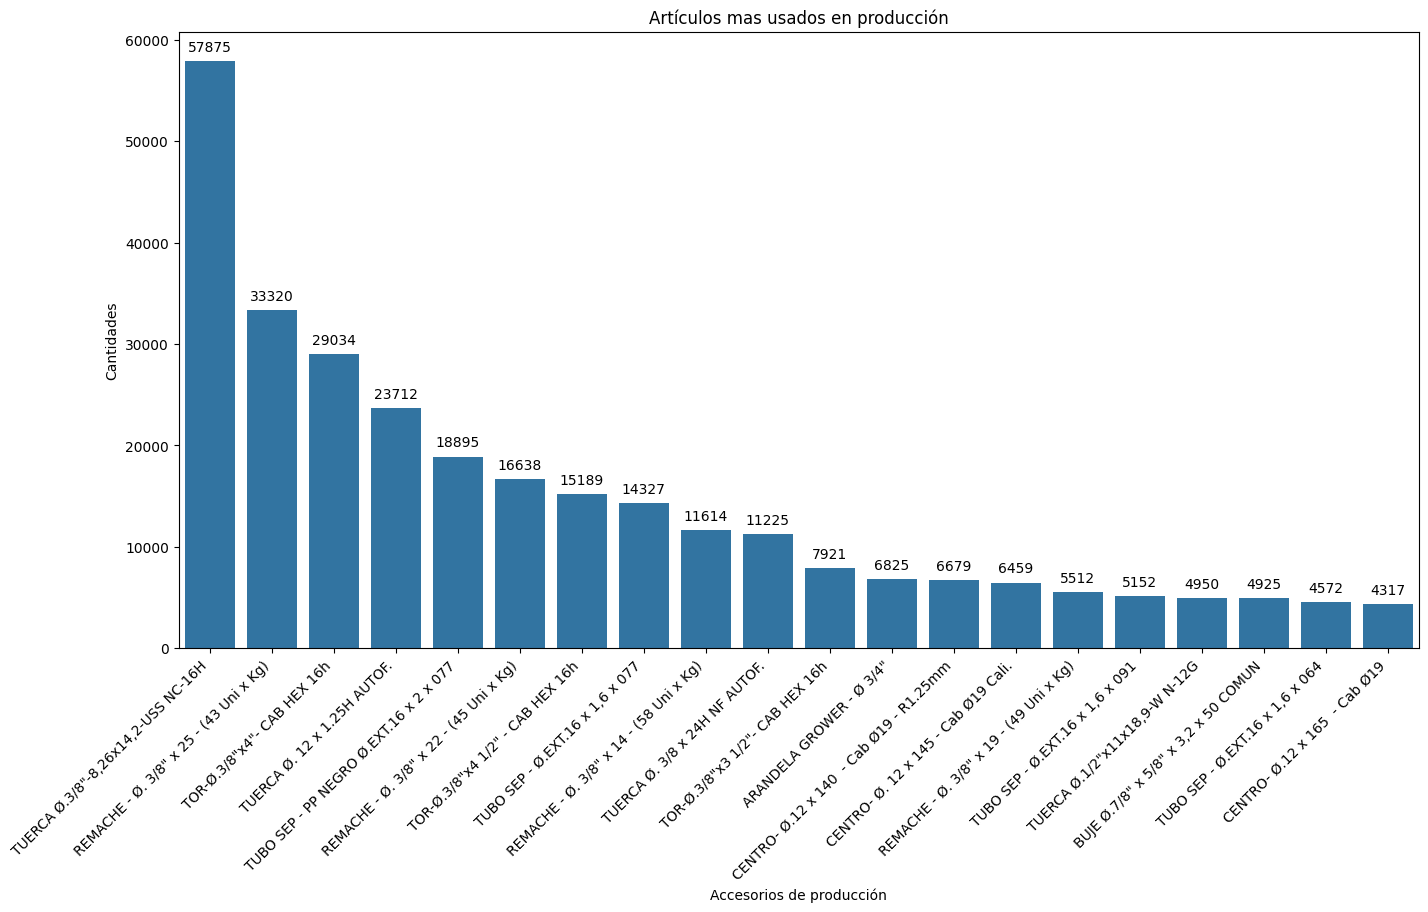

In [ ]:
# @title
# PROMEDIO DE CANTIDADES ANUALES

# Sumar los valores de Cant UM 1 agrupándolos por Desc
df3_cant_art = df3_areas.groupby('Desc')['Cant UM 1'].sum().reset_index()

# Dividir los valores sumados para calcular el promedio anual de los 4 años estudiados
df3_cant_art['Cant UM 1'] = df3_cant_art['Cant UM 1'] / 4

# Ordenar Cant UM 1 en orden descendente
df3_cant_art = df3_cant_art.sort_values(by='Cant UM 1', ascending=False)

# Seleccionar los 20 valores más altos
df3_cant_art = df3_cant_art.head(20)

# Graficar los resultados
plt.subplots(figsize=(16, 8))
ax=sns.barplot(x=df3_cant_art['Desc'], y=df3_cant_art['Cant UM 1'], data=df3_cant_art)

# Agregar los números en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotar las etiquetas del eje x verticalmente
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.title('Artículos mas usados en producción')
plt.xlabel('Accesorios de producción')
plt.ylabel('Cantidades')
plt.show()

#### Interpretación de datos

---

De estos resultados, se desprenden dos conclusiones significativas:

El gráfico proporciona una visión clara de las cantidades necesarias para una producción anualizada. Estos datos se perfilan como fundamentales para la planificación de compras, ya que ofrecen una guía concreta sobre las cantidades requeridas para mantener una producción eficiente.

Se destaca con claridad qué accesorios son los más demandados. Esto permite identificar los elementos con mayor rotación dentro de la fábrica, estableciendo así la prioridad en las adquisiciones. Esta distinción resulta crucial para garantizar un suministro constante de los elementos esenciales y evitar posibles interrupciones en la producción

 ***Nota: Filtré los 20 articulos con mayores cantidades, con el fin de poder resumir un poco la cantidad de datos del grafico.***

### Hipótesis 2: Importes anuales por articulos

---

En esta instancia, mi objetivo es establecer una relación entre las variables "Desc" (descripción del artículo) e "Impte. Neto mon. Local" (importe), con el propósito de analizar los costos de compra de cada artículo a lo largo de un año.

Este análisis será crucial para la elaboración de un presupuesto y una optimización de recursos.

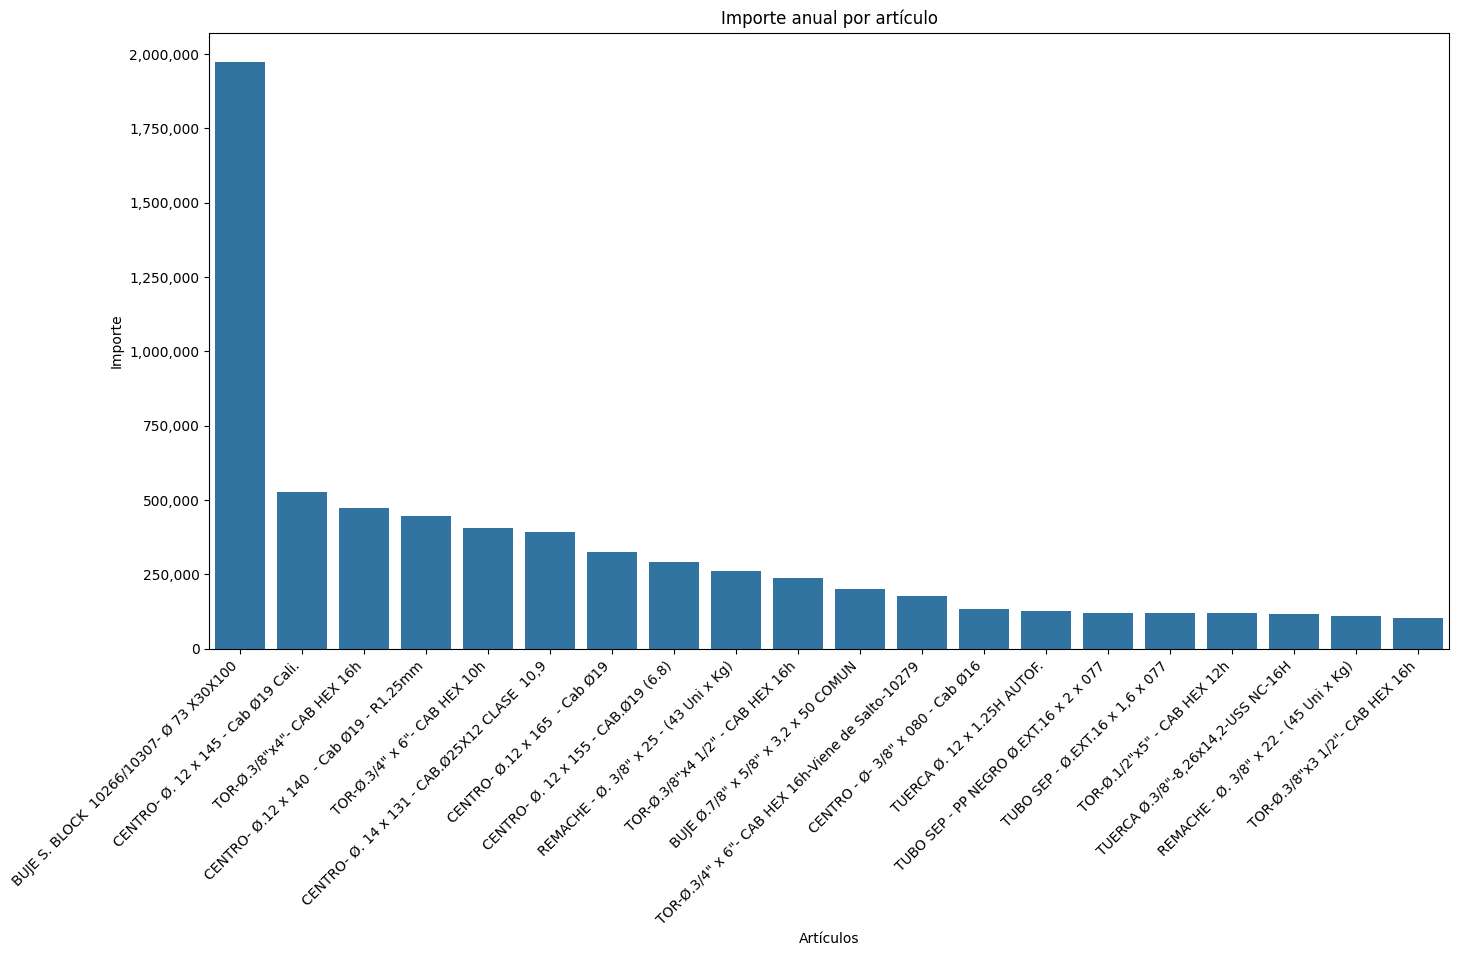

In [ ]:
# @title
# Filtrar solo las columnas relevantes
df3_impor_art = df3_areas[['Desc', 'Impte. Neto mon. Local']]

# Agrupar por 'Desc' y sumar los importes
df3_suma_impor = df3_impor_art.groupby('Desc')['Impte. Neto mon. Local'].sum().reset_index()

# Dividir los valores sumados para calcular el promedio anual de los 4 años estudiados
df3_suma_impor['Impte. Neto mon. Local'] = df3_suma_impor['Impte. Neto mon. Local'] / 4

# Ordenar por importe en orden descendente
df3_suma_impor = df3_suma_impor.sort_values(by='Impte. Neto mon. Local', ascending=False)

# Seleccionar los 20 valores más altos
df3_suma_impor = df3_suma_impor.head(20)

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar los resultados
ax = sns.barplot(x='Desc', y='Impte. Neto mon. Local', data=df3_suma_impor)

# Agregar etiquetas y títulos
plt.title('Importe anual por artículo')
plt.xlabel('Artículos')
plt.ylabel('Importe')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string('%d', x, grouping=True)))

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.show()

#### Interpretación de datos

---

Esta información facilitará la elaboración de un presupuesto anual, lo que contribuirá a un manejo más efectivo de los recursos. Además, permitirá la planificación de las compras al utilizar los datos de costos y cantidades necesarias (hipótesis 1). Este conocimiento es fundamental durante las negociaciones con los proveedores para obtener precios más favorables.

***Nota: Filtré los 20 articulos con mayores importes, con el fin de poder resumir un poco la cantidad de datos del grafico.***

### Hipótesis 3: Frecuencia de cantidades mensuales por articulos

---

Por último, exploraré la relación entre las variables "Mes Contab" (mes de compra), "Cant UM 1" (cantidad) y "Desc" (descripción del artículo). El propósito de este análisis es identificar patrones de compras mensuales para cada artículo, considerando las cantidades requeridas de cada uno.

Para abordar esta hipótesis, me centraré en los cinco artículos con las mayores cantidades compradas (hipótesis 1), ya que son imprescindibles para la producción debido a su alta demanda.



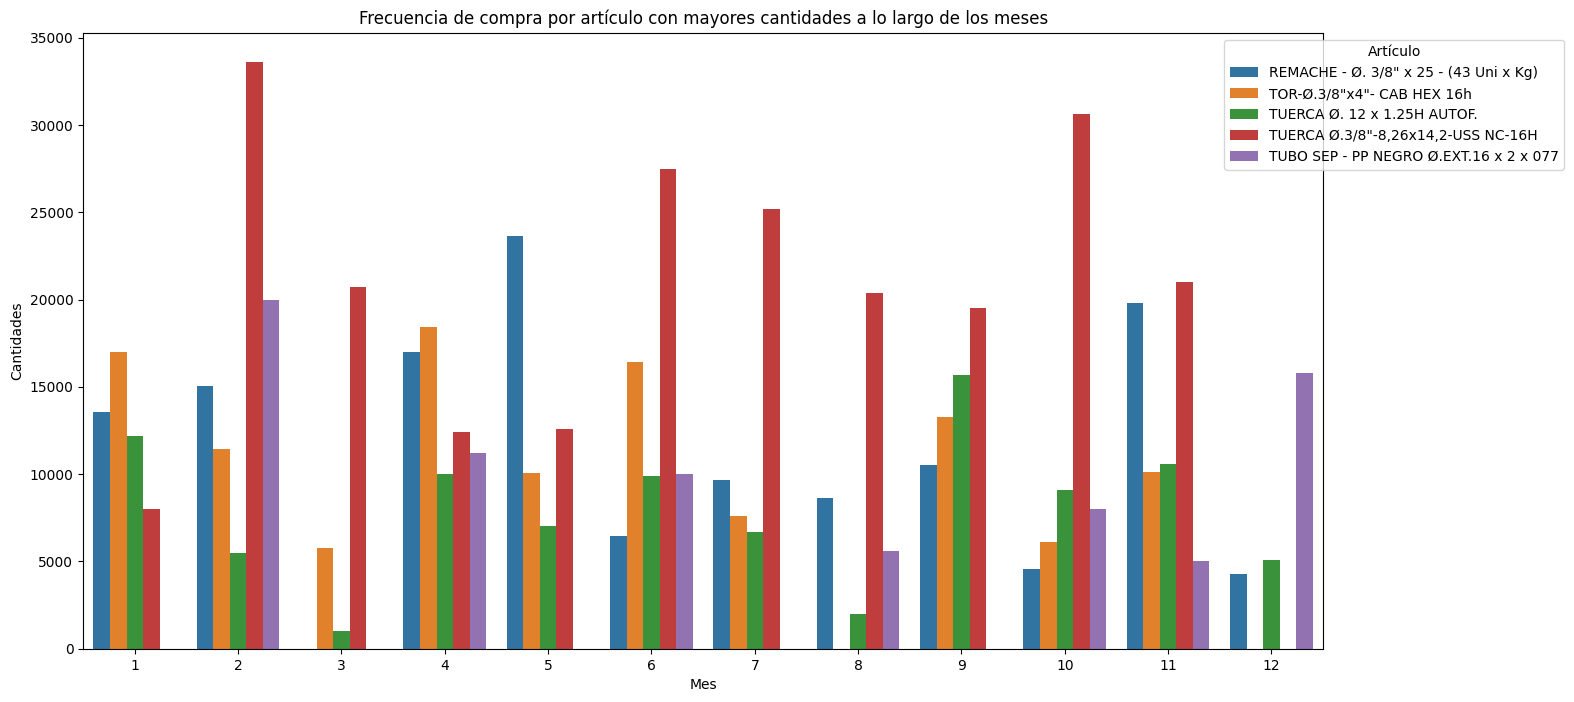

In [ ]:
# @title
# Aplicar valor absoluto a Cant UM 1
df3_areas['Cant UM 1'] = df3_areas['Cant UM 1'].abs()

# Sumar los valores de Cant UM 1 agrupándolos por Desc
df3_cant_art = df3_areas.groupby('Desc')['Cant UM 1'].sum().reset_index()

# Dividir los valores sumados para calcular el promedio anual de los 4 años estudiados
df3_cant_art['Cant UM 1'] = df3_cant_art['Cant UM 1'] / 4

# Ordenar Cant UM 1 en orden descendente
df3_cant_art = df3_cant_art.sort_values(by='Cant UM 1', ascending=False).head(5)

# Calcular la frecuencia de compra total por artículo a lo largo de los meses
df3_frecuencia_art = df3_areas.groupby(['Mes Contab', 'Desc'])['Cant UM 1'].sum().reset_index()

# Encontrar los artículos con mayores cantidades
df3_cant_art = df3_cant_art['Desc'].unique()
df3_frecuencia_art = df3_frecuencia_art[df3_frecuencia_art['Desc'].isin(df3_cant_art)]

# Graficar los resultados
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Mes Contab', y='Cant UM 1', hue='Desc', data=df3_frecuencia_art)

# Ajustar leyenda y etiquetas
plt.legend(title='Artículo', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Frecuencia de compra por artículo con mayores cantidades a lo largo de los meses')
plt.xlabel('Mes')
plt.ylabel('Cantidades')

# Mostrar la gráfica
plt.show()

#### Interpretación de datos

---
Relacionando estas tres variables, se obtiene información crucial en nuestro estudio. Contar con una estimación de cantidades a comprar a lo largo de un año, proporcionará una visión detallada de cómo varían las compras de cada artículo en este periodo de tiempo.

Esto resulta fundamental para la planificación y gestión de inventarios, permitiendo anticipar patrones de demanda, identificar tendencias estacionales y optimizar la planificación de compras


***Nota: Filtré los 5 articulos con mayores cantidades, para resumir la cantidad de datos del gráfico.***

## Análisis exploratorio de datos (EDA)

---
Basándome en las hipótesis planteadas, realizare un estudio detallado en cada punto mencionado anteriormente.

Este enfoque permitirá una comprensión más completa de los datos y, a su vez, facilitará la toma de decisiones fundamentadas en información sólida.

### Artículos más demandados

---

Analizando los artículos que han experimentado un mayor volumen de compras, permitirá identificar las tendencias y anticipar cuáles serán los productos con una demanda más significativa.

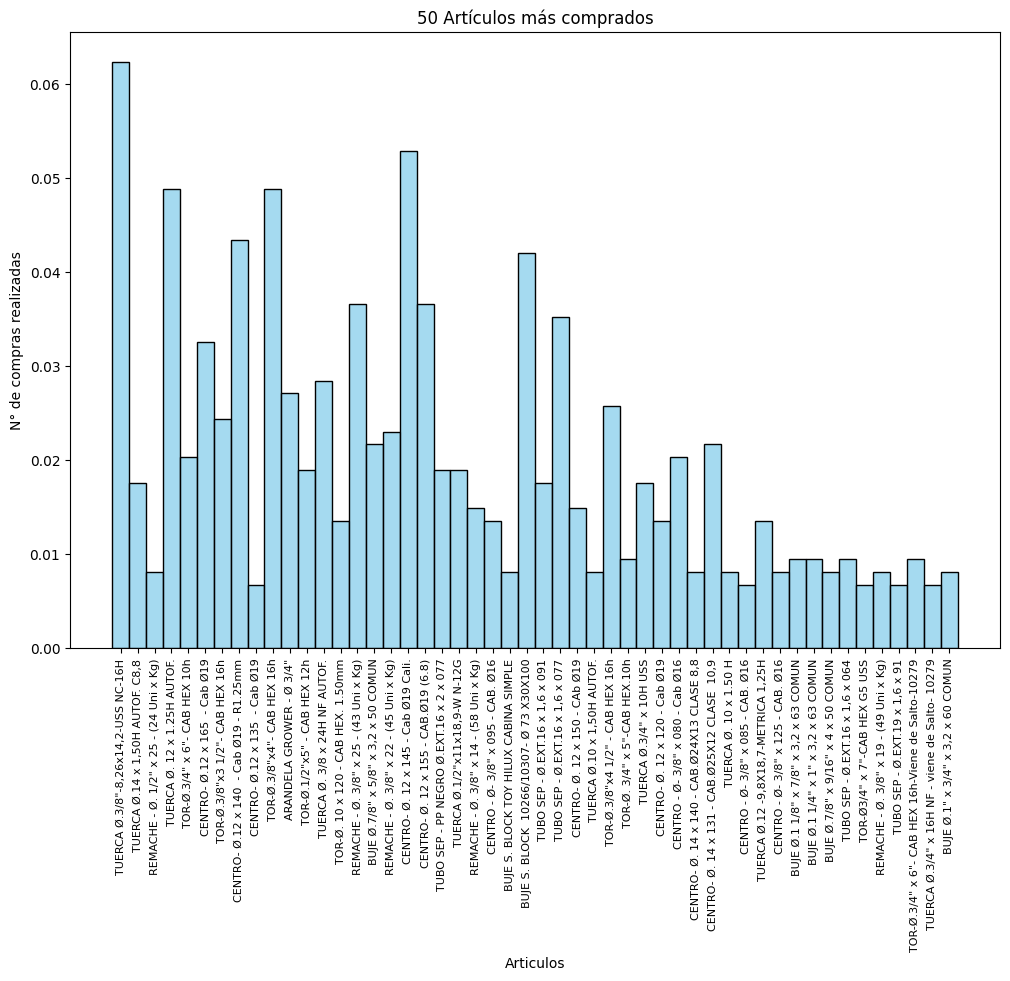

In [ ]:
# @title
# ACUMULACION DE ARTICULOS

# Filtra los 100 artículos más comprados
top_100_articulos = df3_areas['Desc'].value_counts().nlargest(50).index
df_top_100 = df3_areas[df3_areas['Desc'].isin(top_100_articulos)]

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crea un histograma con Seaborn
sns.histplot(df_top_100['Desc'], kde=False, color='skyblue', stat='probability',multiple="stack")

# Personaliza la gráfica
plt.title('50 Artículos más comprados')
plt.xlabel('Articulos')
plt.ylabel('N° de compras realizadas')

# Personaliza las marcas en el eje X
plt.xticks(rotation=90, fontsize=8)

# Muestra el gráfico
plt.show()

#### Interpretación de datos

---


Con la ayuda de este gráfico, podré obtener una comprensión más clara acerca de los artículos que experimentarán una mayor demanda. Esto me permitirá entender las tendencias específicas de cada artículo y realizar un análisis más efectivo, orientándome hacia las direcciones relevantes.

### Comparativa de artículos por cantidades

---

A continuación, se detallarán las cantidades asociadas a los artículos mas empleados, con el objetivo de facilitar la comparación y proporcionar una perspectiva más clara de dichas magnitudes tanto a nivel anual como mensual. Este enfoque permitirá no solo discernir patrones de consumo en general, sino también analizar cómo estos evolucionan a lo largo de los distintos períodos del año. La representación visual de estos datos contribuirá a identificar tendencias y variaciones en los consumos anuales y mensuales, proporcionando así una comprensión más completa de los hábitos de consumo a lo largo del tiempo.

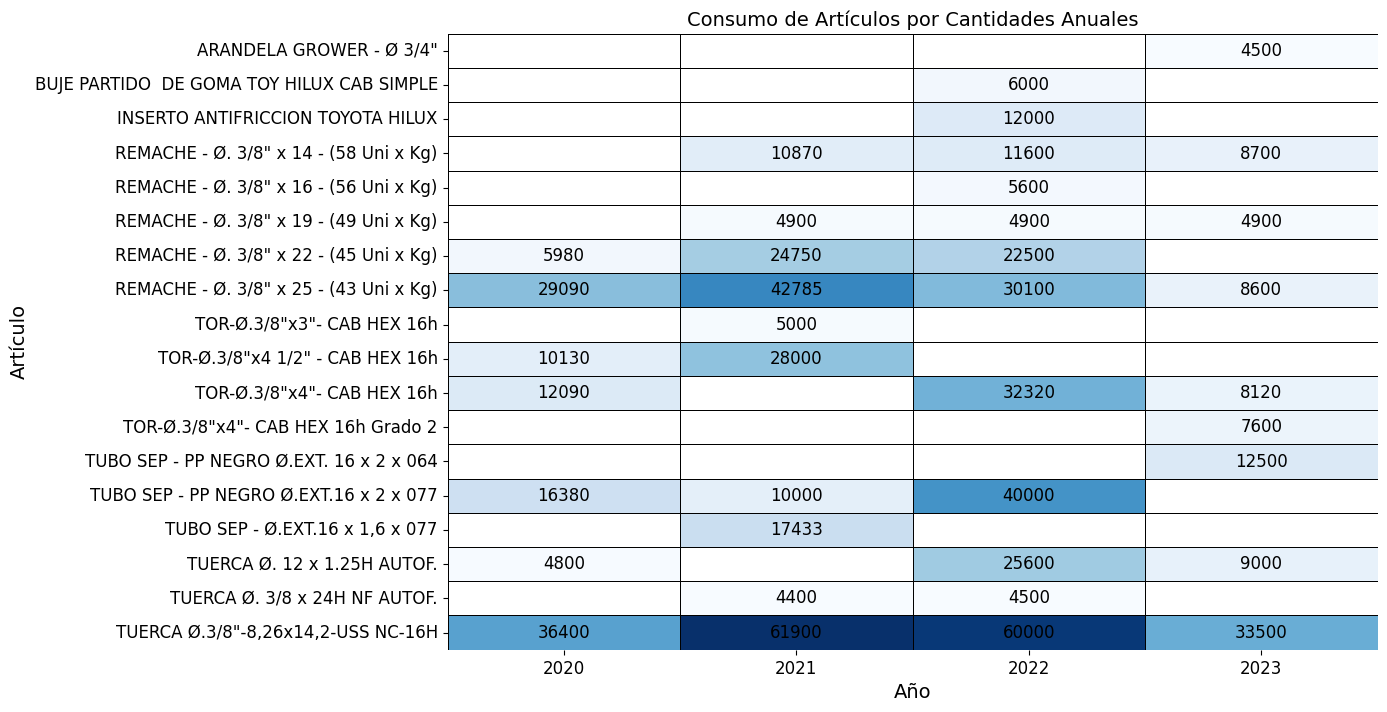

In [ ]:
# @title
      ## Año Contab ##
# Crea una tabla pivote para organizar los datos
pivot_table = top_articulos.pivot_table(index='Desc', columns='Año Contab', values='Cant UM 1', aggfunc='sum')

# Crea el heatmap con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="Blues", annot=True, annot_kws={"size": 12, "color": "black"}, fmt=".0f", linewidths=.5, linecolor='black', cbar=False)

# Personaliza la gráfica
plt.title('Consumo de Artículos por Cantidades Anuales', fontsize=14) # Tamaño de la fuente del titulo)
plt.xlabel('Año', fontsize=14)  # Tamaño de la fuente del eje x))
plt.ylabel('Artículo', fontsize=14)  # Tamaño de la fuente del eje y))
plt.xticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje y

# Muestra el gráfico
plt.show()

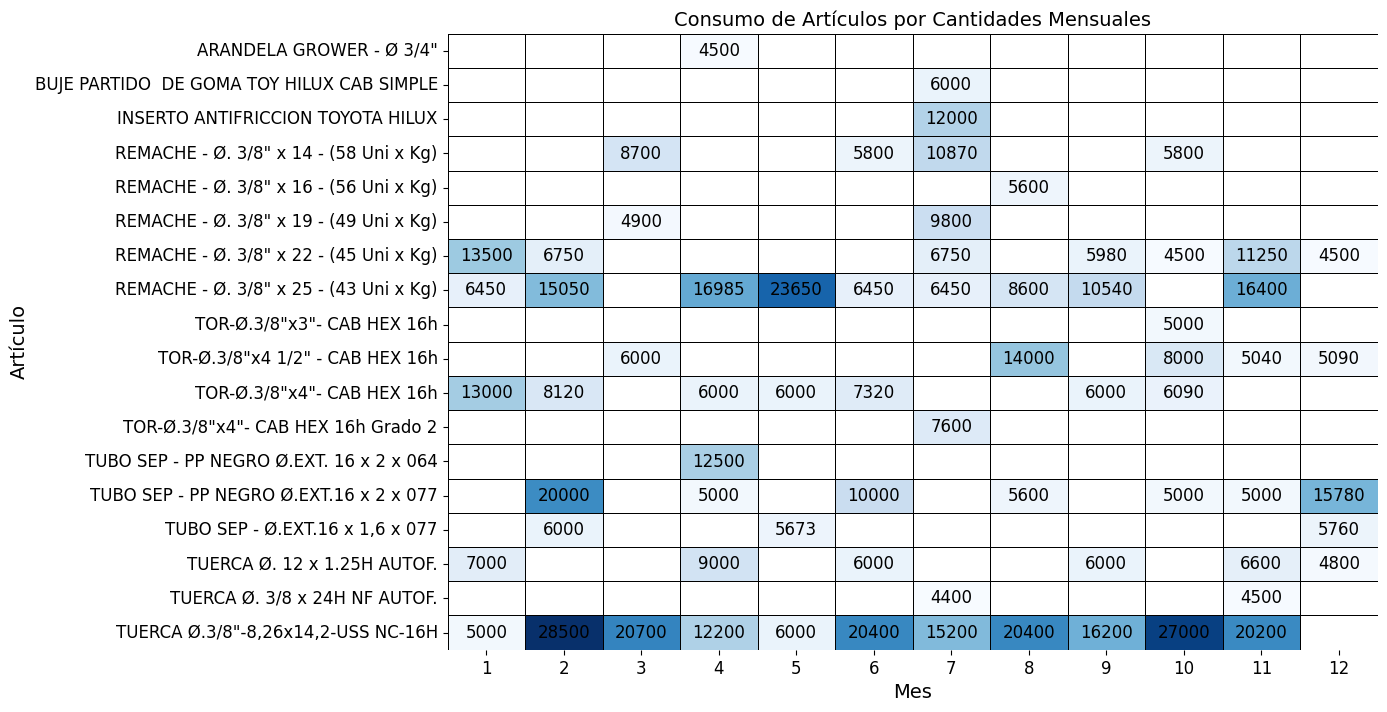

In [ ]:
# @title
      ## Mes Contab ##
# Crea una tabla pivote para organizar los datos
pivot_table = top_articulos.pivot_table(index='Desc', columns='Mes Contab', values='Cant UM 1', aggfunc='sum')

# Crea el heatmap con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="Blues", annot=True, annot_kws={"size": 12, "color": "black"}, fmt=".0f" ,  linewidths=.5, linecolor='black', cbar=False)

# Personaliza la gráfica
plt.title('Consumo de Artículos por Cantidades Mensuales', fontsize=14) # Tamaño de la fuente del titulo
plt.xlabel('Mes', fontsize=14)  # Tamaño de la fuente del eje x)
plt.ylabel('Artículo', fontsize=14)  # Tamaño de la fuente del eje y)
plt.xticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje y

# Muestra el gráfico
plt.show()

#### Interpretación de datos

---

A través del análisis visual de cada artículo, se pueden identificar dos datos cruciales que adquieren relevancia fundamental para la planificación y gestión efectiva del inventario:

1.   Determinar el consumo anual, observando la cantidad total de cada artículo.

2.   Identificar los meses en los cuales se experimentan un notable aumento y disminución en los consumos.


### Importes de compras anuales

---

Analizar los montos anuales proporcionará una visión más completa de la evolución de las compras en cada año, permitiendo comprender las variaciones a lo largo del tiempo. Este enfoque facilitará la proyección de un manejo más eficiente de los recursos económicos.

<ipython-input-172-a00f09cca126>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Año Contab', y='Impte. Neto mon. Local', data=df3_agrupado, palette='Blues')


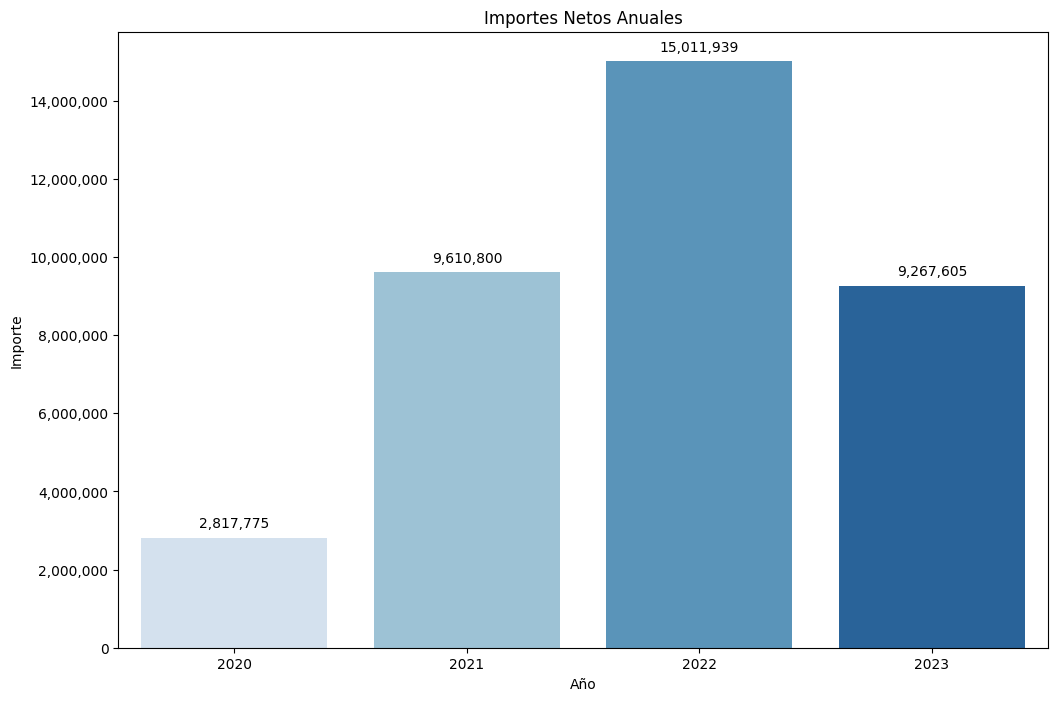

In [ ]:
# @title
# Agrupa por año y suma los importes netos para cada año
df3_agrupado = df3_areas.groupby('Año Contab')['Impte. Neto mon. Local'].sum().reset_index()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crea un gráfico de barras con Seaborn
barplot = sns.barplot(x='Año Contab', y='Impte. Neto mon. Local', data=df3_agrupado, palette='Blues')

# Añadir los valores encima de cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

# Personaliza la gráfica
plt.title('Importes Netos Anuales')
plt.xlabel('Año')
plt.ylabel('Importe')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string('%d', x, grouping=True)))

# Muestra el gráfico
plt.show()

#### Interpretación de Datos

---

Al examinar este gráfico, se observa un bajo volumen de compras en el año 2020, destacándose un aumento significativo para el año 2022. Este fenómeno guarda relación con las cantidades específicas de esos años particulares. Por ende, se llevará a cabo un análisis más detenido para comprender a fondo estos datos.

### Importes de compras mensuales

---

Para profundizar en este análisis, presentaré la evolución de las compras a lo largo del año con el objetivo de identificar algún patrón de estacionalidad.

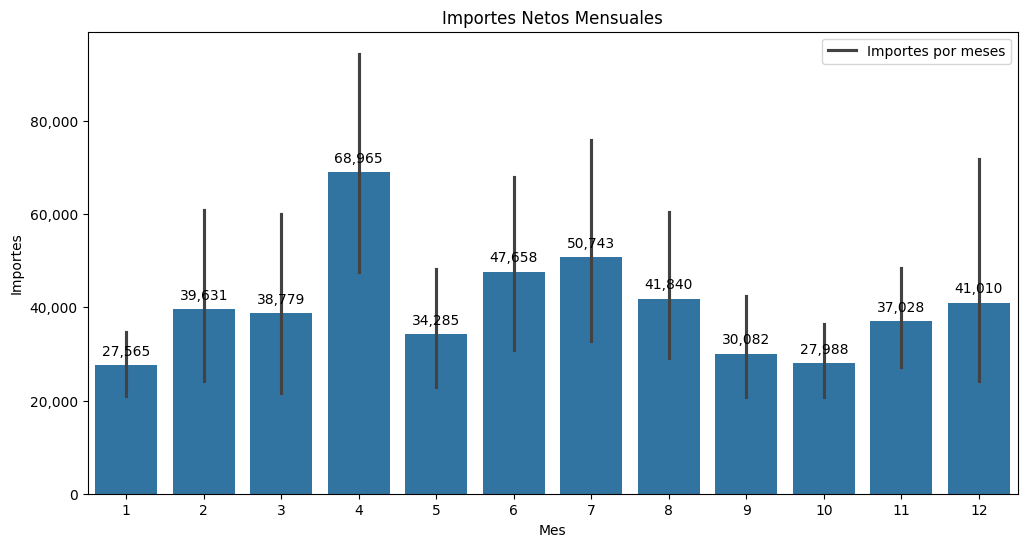

In [ ]:
# @title
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear un gráfico de barras con Seaborn
barplot = sns.barplot(x=df3_areas['Mes Contab'], y=df3_areas['Impte. Neto mon. Local'], ax=ax)

# Añadir los valores encima de cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

# Personalizar la gráfica
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string('%d', x, grouping=True)))
plt.xlabel('Mes')
plt.ylabel('Importes')
plt.title('Importes Netos Mensuales')
plt.legend(['Importes por meses'])

# Mostrar la gráfica
plt.show()

#### Interpretación de Datos

---

Es posible discernir en qué meses se registran los picos máximos y mínimos de compras, lo cual facilita la comprensión de cuáles serán los meses con costos más elevados y más bajos.

### Comparativa de artículos por costos

---

A continuación, llevaré a cabo un análisis más profundo de las compras mensuales y anuales de cada artículo, destacando los que tienen mayores costos. Este enfoque tiene como objetivo facilitar la elaboración de un presupuesto más preciso al tener en cuenta estos costos y la demanda asociada a cada artículo.

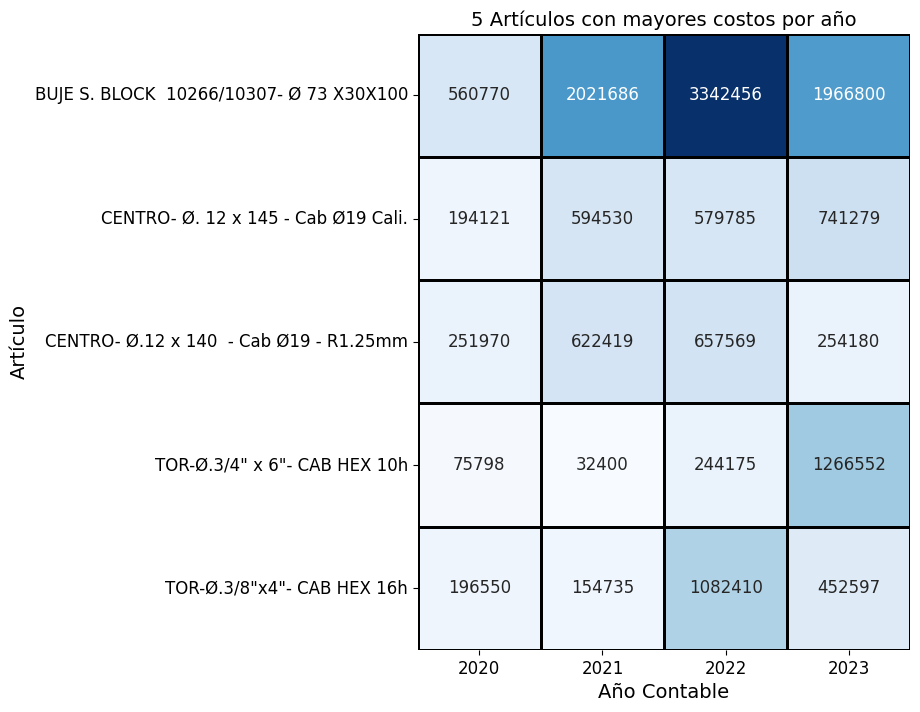

In [ ]:
# @title
    ## Importe por año ##
# Crea una tabla pivote para organizar los datos
pivot_table = df_top_5.pivot_table(index='Desc', columns='Año Contab', values='Impte. Neto mon. Local', aggfunc='sum', fill_value=0)

# Crea el heatmap con Seaborn
plt.figure(figsize=(24, 8))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f", linewidths=1, annot_kws={"size": 12}, linecolor='black', cbar=False, square= 'True')

# Personaliza la gráfica
plt.title('5 Artículos con mayores costos por año', fontsize=14) # Tamaño de la fuente del titulo
plt.xlabel('Año Contable', fontsize=14)  # Tamaño de la fuente del eje x
plt.ylabel('Artículo', fontsize=14)  # Tamaño de la fuente del eje y
plt.xticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje y

# Muestra el gráfico
plt.show()

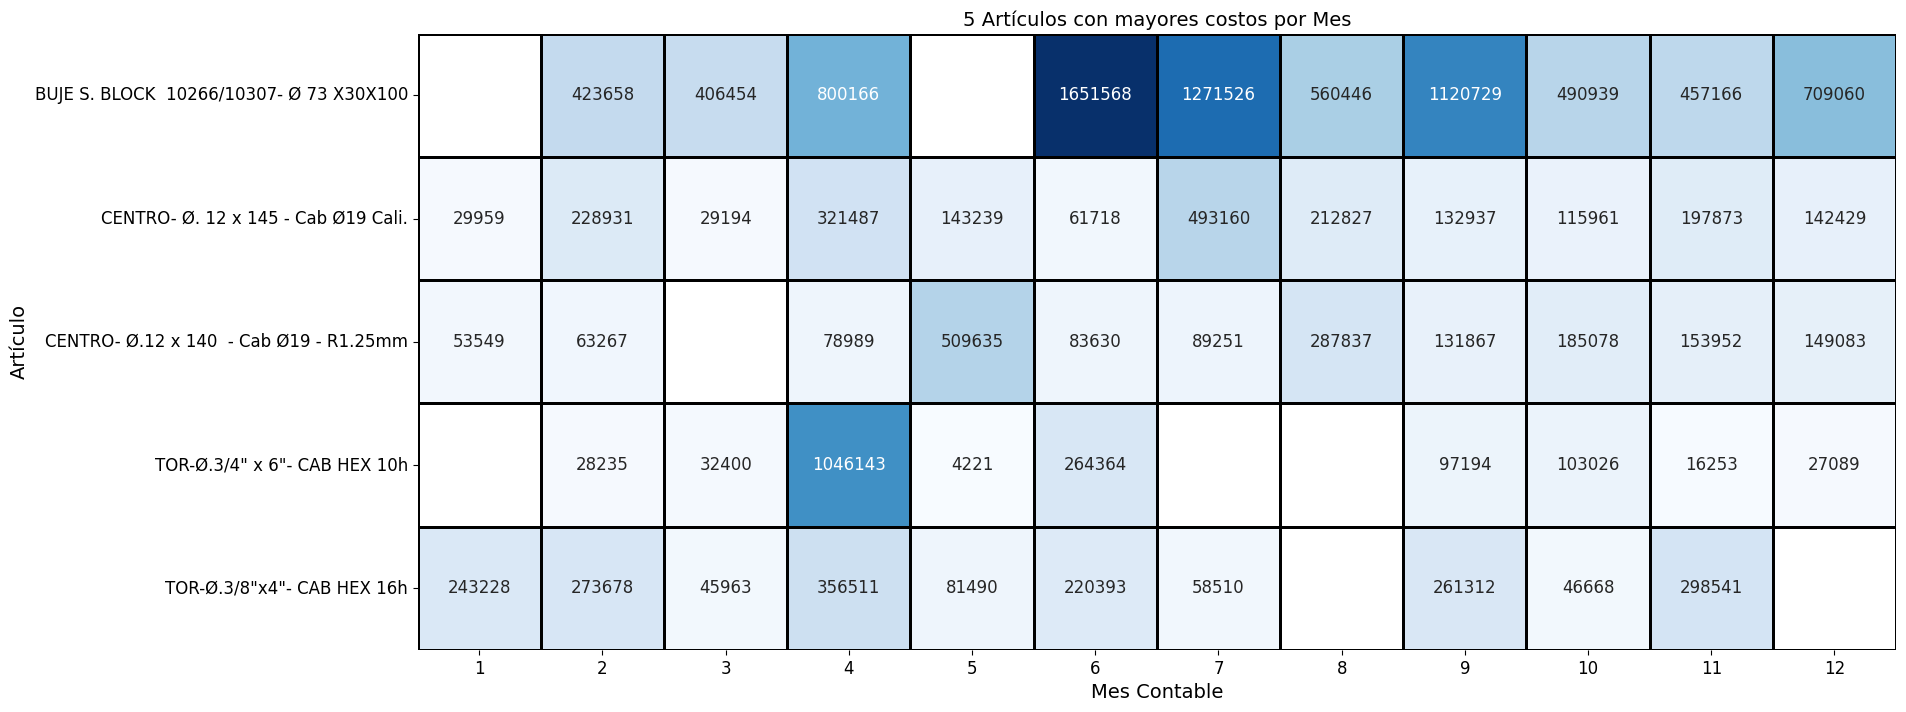

In [ ]:
# @title
      ## Importes por mes ##
# Crea una tabla pivote para organizar los datos
pivot_table = df_top_5.pivot_table(index='Desc', columns='Mes Contab', values='Impte. Neto mon. Local', aggfunc='sum')

# Crea el heatmap con Seaborn
plt.figure(figsize=(24, 8))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f", linewidths=1, annot_kws={"size": 12}, linecolor='black', cbar=False, square= 'True')

# Personaliza la gráfica
plt.title('5 Artículos con mayores costos por Mes', fontsize=14) # Tamaño de la fuente del titulo
plt.xlabel('Mes Contable', fontsize=14) # Tamaño de la fuente del eje x
plt.ylabel('Artículo', fontsize=14) # Tamaño de la fuente del eje y
plt.xticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=12)  # Tamaño de la fuente de las etiquetas del eje y

# Muestra el gráfico
plt.show()

#### Interpretación de Datos

---

Este enfoque permitirá una planificación financiera más precisa al tener en cuenta las tendencias históricas y los costos asociados a los artículos relevantes.

Asimismo, al analizar los gráficos, se pueden identificar los meses con mayores consumos, lo que facilitará una administración más eficiente de los recursos financieros. Al anticipar y prepararse para los picos de demanda en esos meses específicos, se puede optimizar la asignación de presupuesto y garantizar una gestión financiera más sólida a lo largo del año. La combinación de estos enfoques brindará una visión integral que respaldará la toma de decisiones estratégicas en la gestión presupuestaria

### Conclusiones del EDA y próximos pasos

---

Se implementarán estrategias para la planificación de inventario, con el propósito de mejorar la anticipación de las demandas estacionales y optimizar la gestión de recursos de manera más eficiente. Paralelamente, se establecerán puntos de compra mensuales, especialmente diseñados para cada artículo, con el fin de facilitar la reposición y evitar faltantes.

Por otro lado, podremos tomar como referencia los años 2020 y 2022, que representan respectivamente los periodos de menor y mayor producción. Esto nos proporcionará un punto de referencia clave para entender tanto las cantidades como los importes máximos y mínimos.

Estas medidas no solo contribuirán a una gestión de inventario más efectiva, sino que también fortalecerán la gestión financiera al posibilitar la toma de decisiones informadas en cuanto a la asignación de recursos.

## Selección de algoritmos

---

Para avanzar en el análisis, procederé a seleccionar algunos algoritmos que facilitarán el entrenamiento de datos. El objetivo es mejorar el modelo de aprendizaje y obtener resultados precisos que permitan tomar decisiones más acertadas.

### Tiempos de reposición de los artículos

---

Para abordar este aspecto, utilizaré un algoritmo de Árbol de Decisión. Esto facilitará la planificación y predicción de los tiempos de abastecimiento de los artículos.

#### Árbol de Decisión

---


##### Preparación y entrenamiento de Datos

---


In [ ]:
# @title
# Preprocesamiento de datos
df3_areas['Promedio_Mensual'] = df3_areas.groupby(['Año Contab', 'Mes Contab'])['Cant_log'].transform('mean')

# Crear un DataFrame de características y objetivo
X = df3_areas[['Año Contab', 'Mes Contab']].values
y = df3_areas['Promedio_Mensual'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparámetros para el GridSearch
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo de Árbol de Decisión con los mejores parámetros
model_tree = DecisionTreeRegressor(**best_params)
model_tree.fit(X_train, y_train)

# Predicciones del modelo
predictions_train = model_tree.predict(X_train)
predictions_test = model_tree.predict(X_test)

# Funciones para calcular sesgo y varianza
def calculate_bias(predictions, true_values):
    return np.mean(predictions - true_values)

def calculate_variance(predictions):
    return np.var(predictions)

# Visualización de curvas de aprendizaje y ajuste
train_mse = []
test_mse = []
train_mae = []
test_mae = []
train_bias = []
test_bias = []
train_variance = []
test_variance = []
degrees = range(1, 10)  # Puedes ajustar el rango según sea necesario

Mejores parámetros: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


##### Resultados

---

In [ ]:
# @title
# Iteración del modelo, calculando métricas, sesgo y varianza
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)

    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    X_test_poly = poly_features.transform(X_test)

    train_predictions = model.predict(X_train_poly)
    test_predictions = model.predict(X_test_poly)

    # Cálculo de métricas MSE y MAE dentro de la iteración
    train_mse.append(mean_squared_error(y_train, train_predictions))
    test_mse.append(mean_squared_error(y_test, test_predictions))
    train_mae.append(mean_absolute_error(y_train, train_predictions))
    test_mae.append(mean_absolute_error(y_test, test_predictions))

    # Cálculo de sesgo y varianza
    train_bias.append(calculate_bias(train_predictions, y_train))
    test_bias.append(calculate_bias(test_predictions, y_test))
    train_variance.append(calculate_variance(train_predictions))
    test_variance.append(calculate_variance(test_predictions))

    # Imprimir resultados de cada métrica y si el modelo está ajustado o no
    print(f"\nGrado del Polinomio: {degree}")

    print("-----------------------------")

    print("Train MSE:", train_mse[-1])
    print("Test MSE:", test_mse[-1])

    print("-----------------------------")

    print("Train MAE:", train_mae[-1])
    print("Test MAE:", test_mae[-1])

    print("-----------------------------")

    print("Train Bias:", train_bias[-1])

    print("Test Bias:", test_bias[-1])
    print("-----------------------------")

    print("Train Variance:", train_variance[-1])
    print("Test Variance:", test_variance[-1])

    print("-----------------------------")

# Evaluar con MSE si hay underfitting u overfitting
min_test_mse_degree = np.argmin(test_mse) + 1  # Sumar 1 porque el índice comienza en 0
best_degree_mse = degrees[min_test_mse_degree - 1]

print(f"\nEl mejor grado del polinomio para la métrica MSE es: {best_degree_mse}")
if best_degree_mse == 1:
    print("El modelo está underfitting (subajustado). Considera un modelo más complejo.")
elif best_degree_mse == max(degrees):
    print("El modelo está overfitting (sobreajustado). Considera un modelo menos complejo.")
else:
    print("El modelo parece estar bien ajustado.")

print("-----------------------------")

# Evaluar con MAE si hay underfitting u overfitting
min_test_mae_degree = np.argmin(test_mae) + 1  # Sumar 1 porque el índice comienza en 0
best_degree_mae = degrees[min_test_mae_degree - 1]
print(f"\nEl mejor grado del polinomio para la métrica MAE es: {best_degree_mae}")
if best_degree_mae == 1:
    print("El modelo está underfitting (subajustado). Considera un modelo más complejo.")
elif best_degree_mae == max(degrees):
    print("El modelo está overfitting (sobreajustado). Considera un modelo menos complejo.")
else:
    print("El modelo parece estar bien ajustado.")


Grado del Polinomio: 1
-----------------------------
Train MSE: 0.21698819911333905
Test MSE: 0.24532313439459122
-----------------------------
Train MAE: 0.37932521142330156
Test MAE: 0.4060724936968825
-----------------------------
Train Bias: 6.710408778673598e-16
Test Bias: -0.023755331127275126
-----------------------------
Train Variance: 0.020985553342050208
Test Variance: 0.021132182959828827
-----------------------------

Grado del Polinomio: 2
-----------------------------
Train MSE: 0.19619646445185607
Test MSE: 0.22530238368114286
-----------------------------
Train MAE: 0.35628547367278446
Test MAE: 0.38610055271195387
-----------------------------
Train Bias: 6.905599480826204e-13
Test Bias: -0.02876847705598101
-----------------------------
Train Variance: 0.04177728819516363
Test Variance: 0.042098439466559334
-----------------------------

Grado del Polinomio: 3
-----------------------------
Train MSE: 0.12229227671605898
Test MSE: 0.16008616675526793
----------------

##### Gráficos

---

###### Curvas de Aprendizaje

---

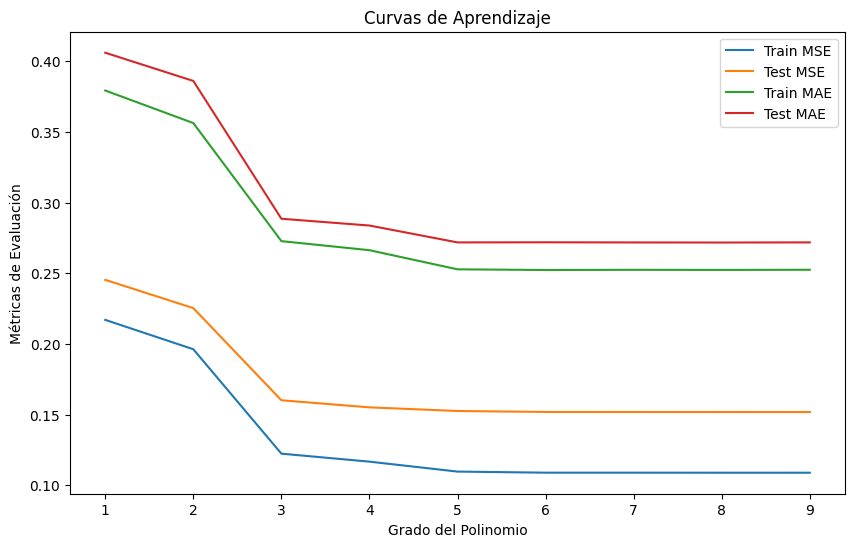

In [ ]:
# @title
# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, label='Train MSE')
plt.plot(degrees, test_mse, label='Test MSE')
plt.plot(degrees, train_mae, label='Train MAE')
plt.plot(degrees, test_mae, label='Test MAE')
plt.title('Curvas de Aprendizaje')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Métricas de Evaluación')
plt.legend()
plt.show()

###### Sesgo

---

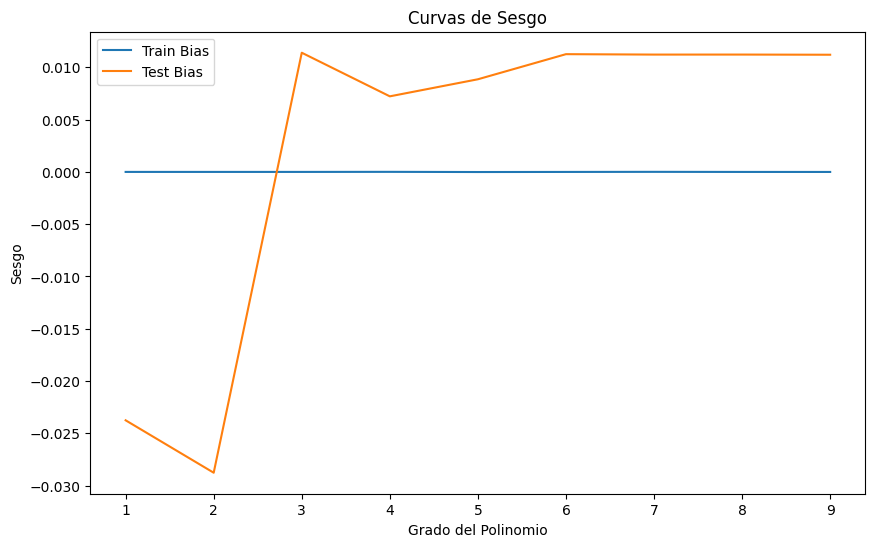

In [ ]:
# @title
# Graficar sesgo
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_bias, label='Train Bias')
plt.plot(degrees, test_bias, label='Test Bias')
plt.title('Curvas de Sesgo')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Sesgo')
plt.legend()
plt.show()

###### Varianza

---

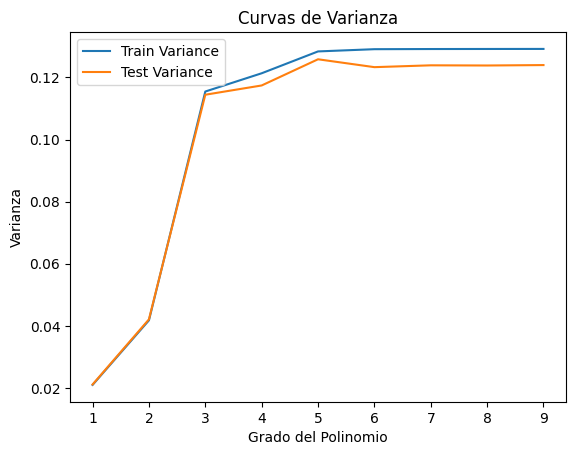

In [ ]:
# @title
# Graficar varianza
plt.plot(degrees, train_variance, label='Train Variance')
plt.plot(degrees, test_variance, label='Test Variance')
plt.title('Curvas de Varianza')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Varianza')
plt.legend()
plt.show()

##### PCA

In [ ]:
# @title
# Crear un DataFrame de características y objetivo
X = df3_areas[['Año Contab', 'Mes Contab']].values

# Instanciar el modelo PCA con el número de componentes deseados
pca = PCA(n_components=2)  # Reducir a 2 componentes principales

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

Varianza explicada por cada componente principal: [0.93062676 0.06937324]


##### Crossvalidation


In [ ]:
# @title
model = DecisionTreeRegressor()
# Aplicar validación cruzada en el conjunto de entrenamiento
scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calcular el promedio de los scores
mean_score_mae = -scores_mae.mean()  # Tomamos el valor absoluto del MAE negativo

print("Promedio de MAE en validación cruzada:", mean_score_mae)

Promedio de MAE en validación cruzada: 0.005216384521968596


### Cantidades mensuales necesarias

---

El modelo de Regresión Ridge, permitirá determinar las cantidades mensuales necesarias por artículo.

#### Regresión Ridge

---



##### Preparación de los datos

---



In [ ]:
# @title
# Preparación de los datos
X = df3_areas[['Año Contab',
               'Mes Contab',
               'Artículo - Cód Gen',
               'Desc_encoded',
               'art_cod_log',
               'art_ord1_encoded',
               'art_ord1_cod_encoded',
               'art_ord2_encoded',
               'art_ord2_cod_encoded',
               'Precio unitario',
               'Impte_log']]

y = df3_areas['Cant_log']

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la rejilla de hiperparámetros para GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Configurar GridSearchCV con el modelo Ridge
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo de regresión Ridge con los mejores parámetros
ridge = Ridge(**best_params)
ridge.fit(X_train_scaled, y_train)

# Predicciones
predictions_train = ridge.predict(X_train_scaled)
predictions_test = ridge.predict(X_test_scaled)

# Cálculo de la varianza
variance_train = np.var(predictions_train)
variance_test = np.var(predictions_test)

# Cálculo de sesgo
bias_train = np.mean(predictions_train - y_train)
bias_test = np.mean(predictions_test - y_test)

# Cálculo de errores con MSE
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

# Cálculo de errores con MAE
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)

Mejores parámetros: {'alpha': 0.1}


##### Resultados

---

In [ ]:
# @title
# Imprimir resultados
print("Error MSE en el conjunto de entrenamiento:", mse_train)
print("Error MSE en el conjunto de prueba:", mse_test)

# Separador
print("-----------------------------")

print("Error MAE en el conjunto de entrenamiento:", mae_train)
print("Error MAE en el conjunto de prueba:", mae_test)

# Separador
print("-----------------------------")

print("Sesgo en el conjunto de entrenamiento:", bias_train)
print("Sesgo en el conjunto de prueba:", bias_test)

# Separador
print("-----------------------------")

print("Varianza en el conjunto de entrenamiento:", variance_train)
print("Varianza en el conjunto de prueba:", variance_test)

# Separador
print("-----------------------------")
print("Coeficientes del modelo:", ridge.coef_)

# Verificar si el modelo está sobreajustado o subajustado
train_score = ridge.score(X_train_scaled, y_train)
test_score = ridge.score(X_test_scaled, y_test)

# Separador
print("-----------------------------")

if train_score > test_score:
    print("El modelo está sobreajustado.")
elif train_score < test_score:
    print("El modelo está subajustado.")
else:
    print("El modelo parece estar bien ajustado.")

Error MSE en el conjunto de entrenamiento: 0.4639883500645778
Error MSE en el conjunto de prueba: 0.3242863455516657
-----------------------------
Error MAE en el conjunto de entrenamiento: 0.4822150565301915
Error MAE en el conjunto de prueba: 0.4216732621226496
-----------------------------
Sesgo en el conjunto de entrenamiento: 2.306319653364966e-16
Sesgo en el conjunto de prueba: -0.00390436214914629
-----------------------------
Varianza en el conjunto de entrenamiento: 1.934895457405571
Varianza en el conjunto de prueba: 1.8570107501487805
-----------------------------
Coeficientes del modelo: [-0.33216495 -0.09263148  1.8615132   0.44539413 -1.73878254  0.26212956
  0.26212956  0.          0.         -0.47429037  1.22578479]
-----------------------------
El modelo está subajustado.


##### Gráficos

---

###### Conjunto de prueba

---

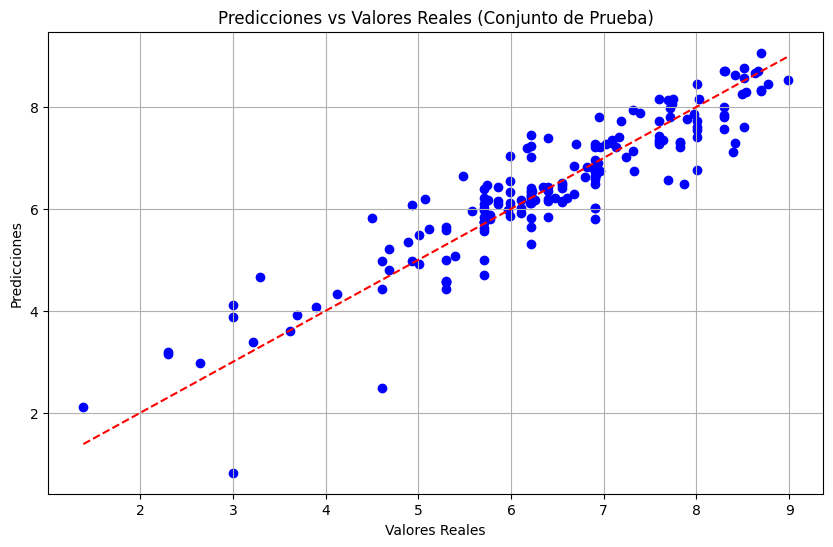

In [ ]:
# @title
# Gráfico de las predicciones vs valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

###### Conjunto de entrenamiento

---


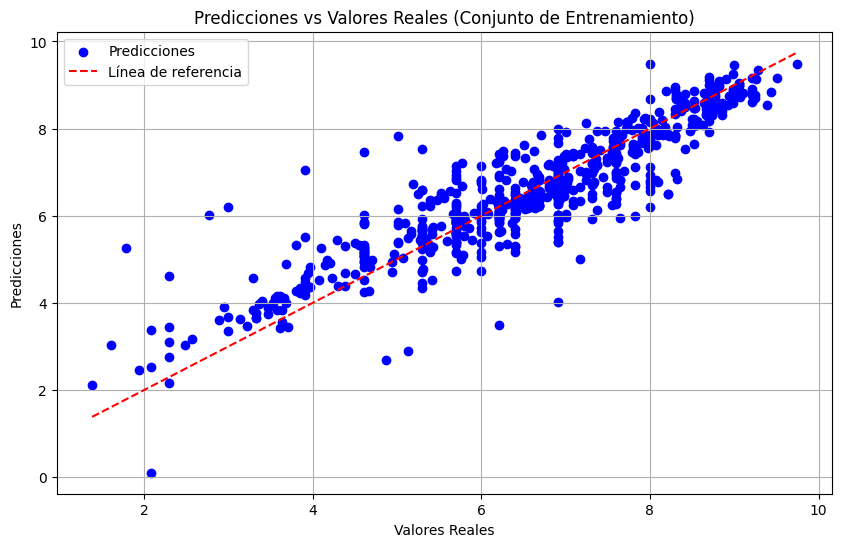

In [ ]:
# @title
# Graficar entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train, color='blue', label='Predicciones')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Línea de referencia')
plt.title('Predicciones vs Valores Reales (Conjunto de Entrenamiento)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()

##### R-cuadrado

---

Para esta métrica, utilizaré un modeo de Regresión Lineal a fin de bajar el valor de la varianza.

In [ ]:
# @title
# Preparación de los datos
X = df3_areas[['Año Contab',
               'Mes Contab',
               'Artículo - Cód Gen',
               'art_cod_log',
               'Desc_encoded',
               'art_ord1_encoded',
               'art_ord1_cod_encoded',
               'art_ord2_encoded',
               'art_ord2_cod_encoded']]

y = df3_areas['Cant_log']

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Cálculo de R-cuadrado
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

# Cálculo de la varianza
variance_train = np.var(predictions_train)
variance_test = np.var(predictions_test)

###### Conjunto de prueba

---



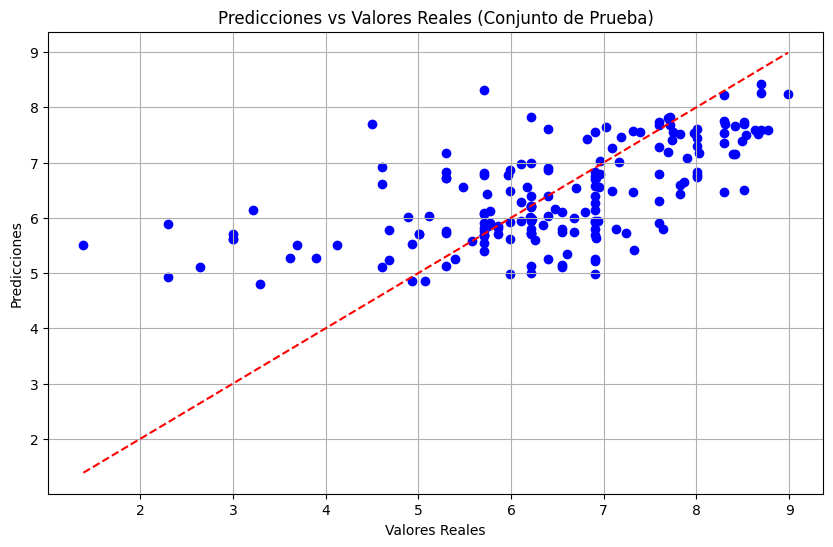

In [ ]:
# @title
# Gráfico de las predicciones vs valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

###### Conjunto de entrenamiento

---



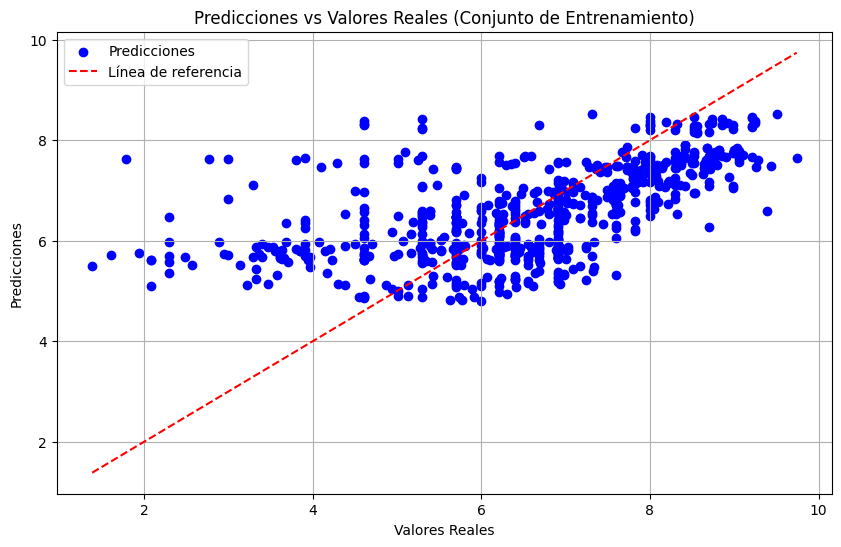

In [ ]:
# @title
# Graficar entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train, color='blue', label='Predicciones')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Línea de referencia')
plt.title('Predicciones vs Valores Reales (Conjunto de Entrenamiento)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()

###### Resultados

---




In [ ]:
# @title
# Imprimir resultados
print("R-cuadrado en el conjunto de entrenamiento:", r2_train)
print("R-cuadrado en el conjunto de prueba:", r2_test)
print("Varianza en el conjunto de entrenamiento:", variance_train)
print("Varianza en el conjunto de prueba:", variance_test)

# Verificar si el modelo está sobreajustado o subajustado
if r2_train > r2_test:
    print("El modelo está sobreajustado.")
elif r2_train < r2_test:
    print("El modelo está subajustado.")
else:
    print("El modelo parece estar bien ajustado.")

R-cuadrado en el conjunto de entrenamiento: 0.33242754609682135
R-cuadrado en el conjunto de prueba: 0.38194181066316313
Varianza en el conjunto de entrenamiento: 0.7982513050017211
Varianza en el conjunto de prueba: 0.757388681567333
El modelo está subajustado.


##### R-cuadrado y MAE

---


###### Preparación y cálculo de datos

---



In [ ]:
# @title
# Preparación de los datos
X = df3_areas[['Año Contab',
               'Mes Contab',
               'Artículo - Cód Gen',
               'art_cod_log',
               'Desc_encoded',
               'art_ord1_encoded',
               'art_ord1_cod_encoded',
               'art_ord2_encoded',
               'art_ord2_cod_encoded']]

y = df3_areas['Cant_log']

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Cálculo de MAE
mae_train = mean_absolute_error(y_train, predictions_train)
mae_test = mean_absolute_error(y_test, predictions_test)

# Cálculo de R-cuadrado
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

# Cálculo de la varianza
variance_train = np.var(predictions_train - y_train)
variance_test = np.var(predictions_test - y_test)

# Análisis de sesgo
bias_train = np.mean(predictions_train - y_train)
bias_test = np.mean(predictions_test - y_test)

###### Curva de aprendizaje

---



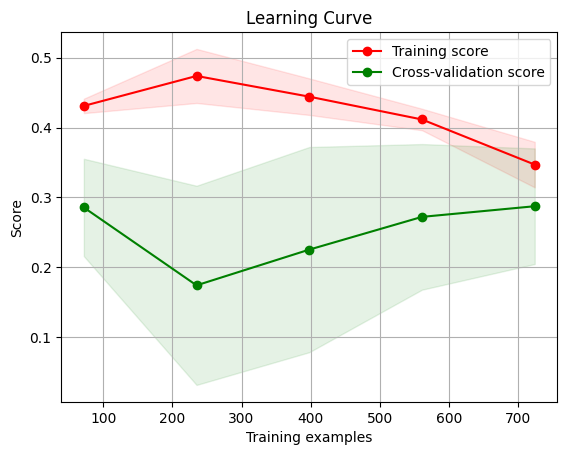

In [ ]:
# @title
# Función para visualizar curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Visualizar curva de aprendizaje
plot_learning_curve(model, "Learning Curve", X, y, cv=5, n_jobs=-1)
plt.show()

###### Resultados

---



In [ ]:
# @title
# Imprimir resultados
print("MAE en el conjunto de entrenamiento:", mae_train)
print("MAE en el conjunto de prueba:", mae_test)
print("R-cuadrado en el conjunto de entrenamiento:", r2_train)
print("R-cuadrado en el conjunto de prueba:", r2_test)
print("Varianza del error en el conjunto de entrenamiento:", variance_train)
print("Varianza del error en el conjunto de prueba:", variance_test)
print("Sesgo en el conjunto de entrenamiento:", bias_train)
print("Sesgo en el conjunto de prueba:", bias_test)

MAE en el conjunto de entrenamiento: 0.9556783380734979
MAE en el conjunto de prueba: 0.839011485518652
R-cuadrado en el conjunto de entrenamiento: 0.33242754609682135
R-cuadrado en el conjunto de prueba: 0.38194181066316313
Varianza del error en el conjunto de entrenamiento: 1.6030277537716526
Varianza del error en el conjunto de prueba: 1.254997887746113
Sesgo en el conjunto de entrenamiento: -2.689070574561705e-14
Sesgo en el conjunto de prueba: -0.041793049097750196


##### PCA

---



In [ ]:
# @title
# Obtener las características (variables independientes)
X = df3_areas[['Mes Contab', 'Año Contab', 'Artículo - Cód Gen']].values

# Instanciar el modelo PCA con el número de componentes deseados
pca = PCA(n_components=2)  # Reducir a 2 componentes principales

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

Varianza explicada por cada componente principal: [0.90852893 0.0677488 ]


##### Crossvalidation

---



In [ ]:
# @title
# Definir el modelo
model = LinearRegression()

# Aplicar validación cruzada en el conjunto de entrenamiento

scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calcular el promedio de los scores
mean_score_mae = -scores_mae.mean()  # Tomamos el valor absoluto del MAE negativo

print("Promedio de MAE en validación cruzada:", mean_score_mae)


Promedio de MAE en validación cruzada: 0.9641262547397809


### Costos de compras anuales y mensuales

---

Utilizando el algoritmo de Regresión Lineal, se podrá armar y planificar un mejor presupuesto.

#### Regresión Lineal

---

##### Preparación y entrenamiento de datos

---

In [ ]:
# @title
# División del conjunto de datos en entrenamiento y prueba
train_size = int(len(df3_areas) * 0.8)
train, test = df3_areas.iloc[:train_size], df3_areas.iloc[train_size:]

# Definir variables independientes adicionales
X = df3_areas[['Año Contab',
               'Mes Contab',
               'Dia Contab',
               'art_cod_log',
               'Cant_log']]

# Dividir en características y objetivo
y = df3_areas[['Desc_encoded',
               'Impte_log']]

# Dividir conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar listas para almacenar las métricas
train_mse = []
test_mse = []
train_mae = []
test_mae = []
train_r2 = []
test_r2 = []
train_variance = []
test_variance = []
train_bias = []
test_bias = []

degrees = range(1, 13)  # Puedes ajustar el rango según sea necesario

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)

    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    X_test_poly = poly_features.transform(X_test)

    train_predictions = model.predict(X_train_poly)
    test_predictions = model.predict(X_test_poly)

    train_mse.append(mean_squared_error(y_train, train_predictions))
    test_mse.append(mean_squared_error(y_test, test_predictions))

    train_mae.append(mean_absolute_error(y_train, train_predictions))
    test_mae.append(mean_absolute_error(y_test, test_predictions))

    train_r2.append(r2_score(y_train, train_predictions))
    test_r2.append(r2_score(y_test, test_predictions))

    train_variance.append(np.var(train_predictions))
    test_variance.append(np.var(test_predictions))

    train_bias.append(np.mean(train_predictions - y_train))
    test_bias.append(np.mean(test_predictions - y_test))

##### Resultados

---

In [ ]:
# @title
# Imprimir resultados
print("Resultados del modelo:")
print("Métricas de error:")
for degree in degrees:
    print(f"Grado {degree}:")
    print(f"  Train MSE: {train_mse[degree-1]}")
    print(f"  Test MSE: {test_mse[degree-1]}")
    print(f"  Train MAE: {train_mae[degree-1]}")
    print(f"  Test MAE: {test_mae[degree-1]}")
    print(f"  Train R2: {train_r2[degree-1]}")
    print(f"  Test R2: {test_r2[degree-1]}")
    print(f"  Train Variance: {train_variance[degree-1]}")
    print(f"  Test Variance: {test_variance[degree-1]}")
    print(f"  Train Bias: {train_bias[degree-1]}")
    print(f"  Test Bias: {test_bias[degree-1]}")
    print("-----------------------------")

# Evaluar con MAE si hay underfitting u overfitting
min_test_mae_degree = np.argmin(test_mae) + 1  # Sumar 1 porque el índice comienza en 0
best_degree_mae = degrees[min_test_mae_degree - 1]

print(f"\nEl mejor grado del polinomio para MAE es: {best_degree_mae}")
if best_degree_mae == 1:
    print("El modelo está underfitting (subajustado). Considera un modelo más complejo.")
elif best_degree_mae == max(degrees):
    print("El modelo está overfitting (sobreajustado). Considera un modelo menos complejo.")
else:
    print("El modelo parece estar bien ajustado.")

# Separador
print("-----------------------------")

# Evaluar con MSE si hay underfitting u overfitting
min_test_mse_degree = np.argmin(test_mse) + 1  # Sumar 1 porque el índice comienza en 0
best_degree = degrees[min_test_mse_degree - 1]

print(f"\nEl mejor grado del polinomio es: {best_degree}")
if best_degree == 1:
    print("El modelo está underfitting (subajustado). Considera un modelo más complejo.")
elif best_degree == max(degrees):
    print("El modelo está overfitting (sobreajustado). Considera un modelo menos complejo.")
else:
    print("El modelo parece estar bien ajustado.")

Resultados del modelo:
Métricas de error:
Grado 1:
  Train MSE: 0.4021179632865232
  Test MSE: 0.3900891501177689
  Train MAE: 0.357794314739907
  Test MAE: 0.3646353160484685
  Train R2: 0.8315698566038452
  Test R2: 0.8302068455383789
  Train Variance: 3.1259928215719537
  Test Variance: 3.098020414059347
  Train Bias: -1.711976171629722e-13
  Test Bias: -0.03507058027388654
-----------------------------
Grado 2:
  Train MSE: 0.3693844148462695
  Test MSE: 0.3833332290346282
  Train MAE: 0.34950800313729863
  Test MAE: 0.3633645134642893
  Train R2: 0.8462514355090913
  Test R2: 0.8341392503642042
  Train Variance: 3.158726369643929
  Test Variance: 3.162204130745995
  Train Bias: 2.572473357720066e-11
  Test Bias: -0.02206599322391553
-----------------------------
Grado 3:
  Train MSE: 0.3834061190230093
  Test MSE: 0.47958404282885664
  Train MAE: 0.3545463992394301
  Test MAE: 0.39982796218584993
  Train R2: 0.8405971814783577
  Test R2: 0.7924567996011975
  Train Variance: 3.2915

##### Gráficos

---

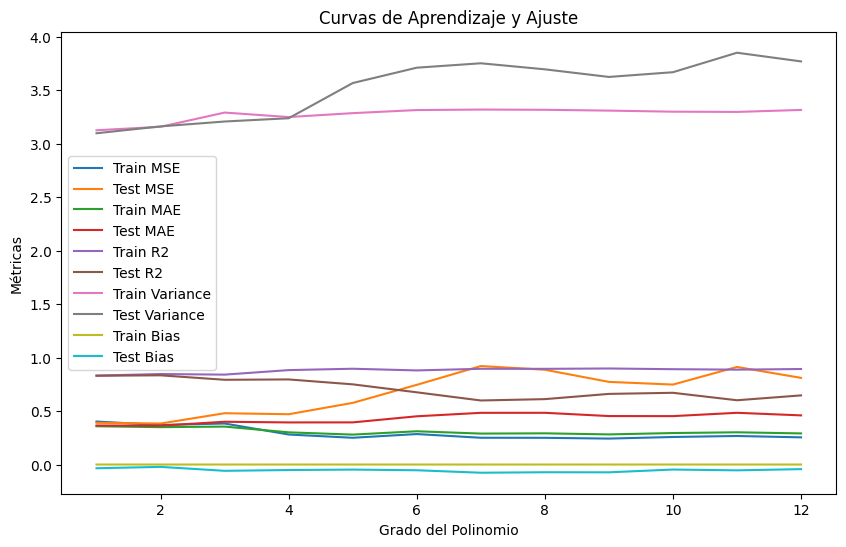

In [ ]:
# @title
# Graficar curvas de aprendizaje y ajuste
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, label='Train MSE')
plt.plot(degrees, test_mse, label='Test MSE')
plt.plot(degrees, train_mae, label='Train MAE')
plt.plot(degrees, test_mae, label='Test MAE')
plt.plot(degrees, train_r2, label='Train R2')
plt.plot(degrees, test_r2, label='Test R2')
plt.plot(degrees, train_variance, label='Train Variance')
plt.plot(degrees, test_variance, label='Test Variance')
plt.plot(degrees, train_bias, label='Train Bias')
plt.plot(degrees, test_bias, label='Test Bias')
plt.title('Curvas de Aprendizaje y Ajuste')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Métricas')
plt.legend()
plt.show()

##### PCA

---

In [ ]:
# @title
# Obtener las características (variables independientes)
X = df3_areas[['Año Contab', 'Mes Contab', 'Dia Contab', 'art_cod_log', 'Cant_log']].values

# Instanciar el modelo PCA con el número de componentes deseados
pca = PCA(n_components=2)  # Reducir a 2 componentes principales

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

Varianza explicada por cada componente principal: [0.87619269 0.09562056]


##### Crossvalidation

---

In [ ]:
# @title
#model = DecisionTreeRegressor()
model = LinearRegression()
# Aplicar validación cruzada en el conjunto de entrenamiento
scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calcular el promedio de los scores
mean_score_mae = -scores_mae.mean()  # Tomamos el valor absoluto del MAE negativo

print("Promedio de MAE en validación cruzada:", mean_score_mae)

Promedio de MAE en validación cruzada: 0.360708622781286


### Articulos con mayores consumos y costos

---

Por último, utilizando el algoritmo de KNN, se pretende identificar los artículos con mayores consumos y costos, tanto a nivel mensual como anual, con el objetivo de realizar una planificación a largo plazo.

#### KNN

---


##### Procesamiento y entrenamiento de datos

---

In [ ]:
# @title
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor

# Seleccionar las variables de interés
variables = ['art_cod_log',
             'Desc_encoded',
             'Cant_log',
             'Precio unitario_log',
             'Dia Contab',
             'Mes Contab',
             'Año Contab',
             'art_ord1_cod_encoded',
             'art_ord1_encoded',
             'art_ord2_cod_encoded',
             'art_ord2_encoded'
             ]

X = df3_areas[variables]
y = df3_areas['Impte_log']  # Reemplaza 'target_variable' con el nombre real de la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementar la técnica de hypertuning de parámetros usando GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo KNN con los mejores parámetros
knn = KNeighborsRegressor(**best_params)
knn.fit(X_train, y_train)

# Calcular la varianza, el sesgo y las métricas de evaluación (MSE, MAE y R²)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Varianza y sesgo
varianza = np.var(y_test_pred)
sesgo = np.mean((y_test - y_test_pred) ** 2)

Mejores parámetros: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}


##### Gráfico

---

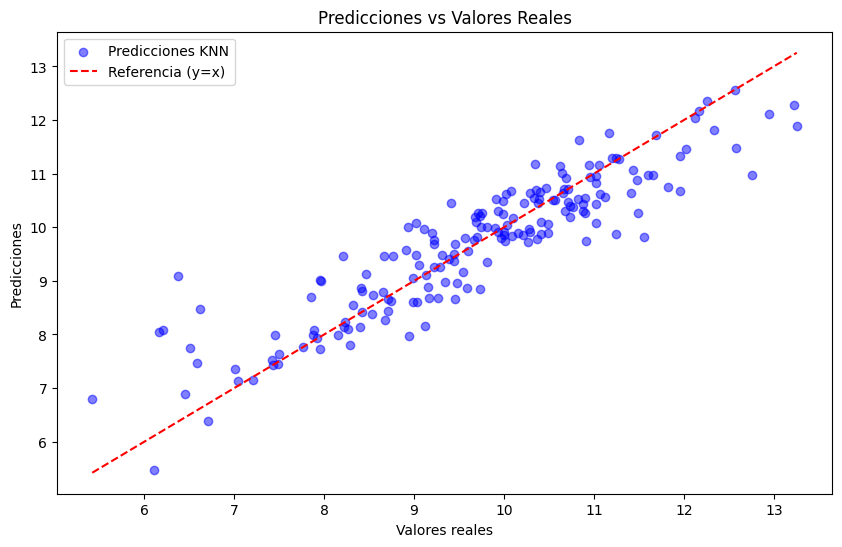

In [ ]:
# @title
# Scatter plot de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Predicciones KNN', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Referencia (y=x)')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()


##### Resultados

---

In [ ]:
# @title
print(f"Varianza: {varianza}")
print(f"Sesgo: {sesgo}")
print(f"MSE (entrenamiento): {mse_train}")
print(f"MSE (prueba): {mse_test}")
print(f"MAE (entrenamiento): {mae_train}")
print(f"MAE (prueba): {mae_test}")
print(f"R² (entrenamiento): {r2_train}")
print(f"R² (prueba): {r2_test}")

# Verificar si el modelo está sobreajustado, subajustado o bien ajustado
def verificar_ajuste(r2_train, r2_test):
    if r2_train < r2_test:
        print("El modelo está sobreajustado (overfitting)r2")
    elif r2_train > r2_test:
        print("El modelo está subajustado (underfitting)r2")
    else:
        print("El modelo está bien ajustado")

# Llamamos a la función con las métricas MSE obtenidas
verificar_ajuste(r2_train, r2_test)

# Verificar si el modelo está sobreajustado, subajustado o bien ajustado
def verificar_ajuste(mse_train, mse_test):
    if mse_train < mse_test:
        print("El modelo está sobreajustado (overfitting)mse")
    elif mse_train > mse_test:
        print("El modelo está subajustado (underfitting)mse")
    else:
        print("El modelo está bien ajustado")

# Llamamos a la función con las métricas MSE obtenidas
verificar_ajuste(mse_train, mse_test)

# Verificar si el modelo está sobreajustado, subajustado o bien ajustado
def verificar_ajuste(mae_train, mse_test):
    if mae_train < mae_test:
        print("El modelo está sobreajustado (overfitting) mae")
    elif mae_train > mae_test:
        print("El modelo está subajustado (underfitting) mae")
    else:
        print("El modelo está bien ajustado")

# Llamamos a la función con las métricas MSE obtenidas
verificar_ajuste(mae_train, mae_test)


Varianza: 1.638292620960962
Sesgo: 0.41337272575761597
MSE (entrenamiento): 2.5436667838999898e-14
MSE (prueba): 0.41337272575761597
MAE (entrenamiento): 8.382543661042362e-09
MAE (prueba): 0.4665756331368607
R² (entrenamiento): 0.9999999999999896
R² (prueba): 0.8226741629642136
El modelo está subajustado (underfitting)r2
El modelo está sobreajustado (overfitting)mse
El modelo está sobreajustado (overfitting) mae


##### PCA

---


In [ ]:
# @title
# Obtener las características (variables independientes)
X = df3_areas[variables].values

# Instanciar el modelo PCA con el número de componentes deseados
pca = PCA(n_components=2)  # Reducir a 2 componentes principales

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

Varianza explicada por cada componente principal: [0.84533828 0.09231808]


##### Crossvalidation

---

MAE (validación cruzada): 0.5084158908939405 +/- 0.029008051148453253
MAE (sobre todo el conjunto de datos): 6.706034928833889e-09


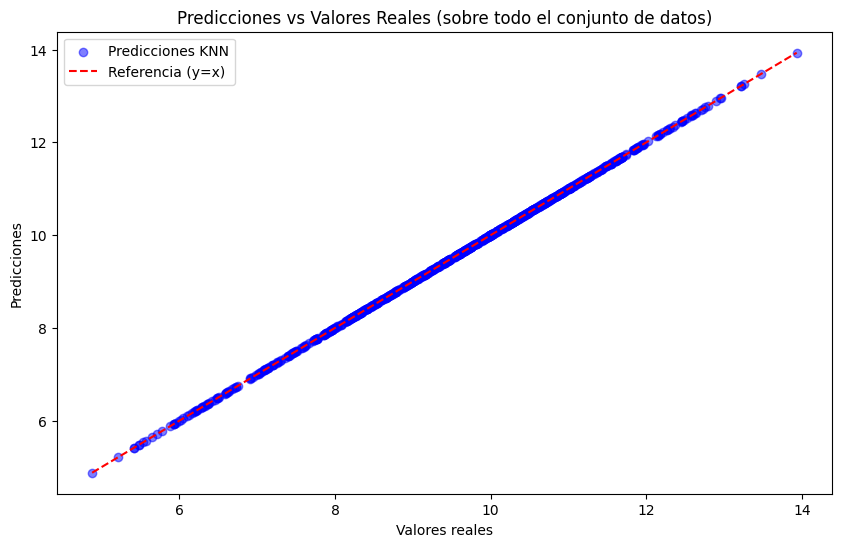

In [ ]:
# @title
from sklearn.model_selection import cross_val_score, KFold

# Definir el número de pliegues para la validación cruzada
num_folds = 5  # Puedes ajustar este valor según lo desees

# Crear una instancia de KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Crear un modelo KNeighborsRegressor con los mejores parámetros encontrados
knn = KNeighborsRegressor(**best_params)

# Realizar la validación cruzada para MAE
mae_scores = cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)

# Convertir los puntajes de error absoluto medio a valores positivos
mae_scores = -mae_scores

# Calcular el promedio y la desviación estándar de los puntajes MAE
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print(f"MAE (validación cruzada): {mean_mae} +/- {std_mae}")

# Entrenar el modelo KNN con todos los datos
knn.fit(X, y)

# Predicciones sobre todo el conjunto de datos
y_pred = knn.predict(X)

# Calcular el MAE usando todos los datos
mae = mean_absolute_error(y, y_pred)
print(f"MAE (sobre todo el conjunto de datos): {mae}")

# Scatter plot de predicciones vs valores reales sobre todo el conjunto de datos
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, label='Predicciones KNN', color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Referencia (y=x)')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (sobre todo el conjunto de datos)')
plt.legend()
plt.show()



### Insigths de los modelos

---



* **Primer Modelo: Tiempos de Reposición de los Artículos**
---

**Modelo: Árbol de Decisión**

**Insight 1: Varianza y Sesgo**

Varianza Baja, Sesgo Moderado: A medida que se incrementa el grado del polinomio, la varianza del modelo en el conjunto de entrenamiento aumenta, pero se mantiene baja en los conjuntos de prueba, indicando que el modelo está capturando patrones específicos del conjunto de entrenamiento.

Sobreajuste en Grados Altos: Los grados más altos muestran un sobreajuste, evidenciado por la disminución significativa en el error del entrenamiento sin una mejora proporcional en el error de prueba.

**Insight 2: Complejidad del Modelo**

Grados Altos No Mejoran Pruebas: Aunque los grados polinomiales altos (8 y 9) reducen los errores de entrenamiento, no mejoran significativamente los errores de prueba, lo que sugiere que una complejidad adicional no está aportando valor real.

* **Segundo Modelo: Cantidades Mensuales Necesarias**
---
**Modelo: Regresión Ridge**

**Insight 1: Subajuste del Modelo**

Errores Elevados en Conjuntos de Entrenamiento y Prueba: Los errores MSE y MAE son considerablemente altos en ambos conjuntos, indicando que el modelo no está capturando adecuadamente las relaciones subyacentes en los datos.

Varianza y Sesgo Moderados: La varianza y el sesgo en los conjuntos de entrenamiento y prueba indican que el modelo tiene dificultad para ajustar la complejidad de los datos.

**Insight 2: Importancia de Características**

Coeficientes Significativos: Algunos coeficientes tienen valores altos y otros son cercanos a cero, sugiriendo que ciertas características tienen un impacto mayor en la predicción y otras pueden ser redundantes.

* **Tercer Modelo: Costos de Compras Anuales y Mensuales**
---
**Modelo: Regresión Lineal**

**Insight 1: Ajuste del Modelo**

Grado Polinomial 2 Óptimo: El grado polinomial 2 ofrece un equilibrio adecuado entre precisión y complejidad, con bajos errores MSE y MAE en los conjuntos de entrenamiento y prueba.

Overfitting en Grados Superiores: Grados polinomiales superiores a 4 muestran un sobreajuste evidente, donde la complejidad del modelo no se traduce en mejoras significativas en el conjunto de prueba.

**Insight 2: Rendimiento y Generalización**

R² y Varianza: Los valores de R² y varianza indican que el modelo con grado 2 captura bien la variabilidad de los datos sin caer en el sobreajuste, haciendo que las predicciones sean más confiables.

* **Cuarto Modelo: Artículos con Mayores Consumos y Costos**
---
**Modelo: K-Nearest Neighbors (KNN)**

**Insight 1: Sobreajuste del Modelo**

Errores de Entrenamiento Cercanos a Cero: La MSE y MAE en el conjunto de entrenamiento son casi nulas, indicando un ajuste perfecto, pero esto no se refleja en el conjunto de prueba, señalando un sobreajuste significativo.

Desempeño en Prueba: La MSE y MAE en el conjunto de prueba son significativamente mayores, lo que confirma que el modelo no generaliza bien a datos no vistos.

**Insight 2: Validación Cruzada**

MAE Consistente: La validación cruzada muestra una MAE similar a la del conjunto de prueba, sugiriendo que aunque el modelo está sobreajustado, es consistente en su rendimiento en datos no vistos.

Parámetros Optimizados: Los mejores parámetros encontrados (algorithm = brute, n_neighbors = 3, weights = distance) son adecuados para el conjunto de datos, pero el modelo aún necesita mejoras para evitar el sobreajuste.

* **Conclusión General**
---
Ajuste y Selección de Modelos:

Evitar el Sobreajuste: Los modelos más complejos (grados polinomiales altos, KNN con muchos vecinos) tienden a sobreajustar. Es crucial encontrar el equilibrio entre complejidad y generalización.
Validación Cruzada: Es una herramienta valiosa para evaluar la consistencia y generalización de los modelos.
Reducción de Características: Simplificar los modelos eliminando características irrelevantes puede mejorar su rendimiento y reducir el riesgo de sobreajuste.

### Conclusión de los resultados obtenidos

---



En conclusión, los resultados revelan que algunos modelos que no se ajustan de manera adecuada al problema planteado, evidenciando errores significativos, lo que los hace inapropiados para su aplicación en predicciones.

Por otro lado, los demas modelos demostraron una buena adaptación durante el entrenamiento de datos, lo cual representa un avance significativo para alcanzar los objetivos establecidos en este análisis.

Ante esta situación, se propone realizar ajustes en ciertos parámetros del código para obtener resultados mejorados. En caso de que estas correcciones no generen mejoras sustanciales, se procederá a explorar otras posibles soluciones, como buscar otros algoritmos que se adapten de manera más efectiva a los problemas descritos.

Esta búsqueda de soluciones tiene como objetivo mejorar la eficiencia en el entrenamiento de los modelos, con el propósito de mejorar su poder predictivo y obtener datos más precisos y confiables, que contribuyan a la toma de decisiones.
